##### Copyright 2018 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Overfit and underfit

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/overfit_and_underfit"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/overfit_and_underfit.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/overfit_and_underfit.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/keras/overfit_and_underfit.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

As always, the code in this example will use the `tf.keras` API, which you can learn more about in the TensorFlow [Keras guide](https://www.tensorflow.org/guide/keras).

In both of the previous examples—[classifying text](https://www.tensorflow.org/tutorials/keras/text_classification_with_hub) and [predicting fuel efficiency](https://www.tensorflow.org/tutorials/keras/regression) — we saw that the accuracy of our model on the validation data would peak after training for a number of epochs, and would then stagnate or start decreasing.

In other words, our model would *overfit* to the training data. Learning how to deal with overfitting is important. Although it's often possible to achieve high accuracy on the *training set*, what we really want is to develop models that generalize well to a *testing set* (or data they haven't seen before).

The opposite of overfitting is *underfitting*. Underfitting occurs when there is still room for improvement on the train data. This can happen for a number of reasons: If the model is not powerful enough, is over-regularized, or has simply not been trained long enough. This means the network has not learned the relevant patterns in the training data.

If you train for too long though, the model will start to overfit and learn patterns from the training data that don't generalize to the test data. We need to strike a balance. Understanding how to train for an appropriate number of epochs as we'll explore below is a useful skill.

To prevent overfitting, the best solution is to use more complete training data. The dataset should cover the full range of inputs that the model is expected to handle. Additional data may only be useful if it covers new and interesting cases.

A model trained on more complete data will naturally generalize better. When that is no longer possible, the next best solution is to use techniques like regularization. These place constraints on the quantity and type of information your model can store.  If a network can only afford to memorize a small number of patterns, the optimization process will force it to focus on the most prominent patterns, which have a better chance of generalizing well.

In this notebook, we'll explore several common regularization techniques, and use them to improve on a classification model.

## Setup

Before getting started, import the necessary packages:

In [3]:
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import regularizers

print(tf.__version__)

2.3.1


In [4]:
!pip install -q git+https://github.com/tensorflow/docs

import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

In [5]:
from  IPython import display
from matplotlib import pyplot as plt

import numpy as np

import pathlib
import shutil
import tempfile


In [6]:
logdir = pathlib.Path(tempfile.mkdtemp())/"tensorboard_logs"
shutil.rmtree(logdir, ignore_errors=True)

## The Higgs Dataset

The goal of this tutorial is not to do particle physics, so don't dwell on the details of the dataset. It contains 11&#x202F;000&#x202F;000 examples, each with 28 features, and a binary class label.

In [7]:
gz = tf.keras.utils.get_file('HIGGS.csv.gz', 'http://mlphysics.ics.uci.edu/data/higgs/HIGGS.csv.gz')

      8192/2816407858 [..............................] - ETA: 21s

     16384/2816407858 [..............................] - ETA: 6:22:46

     40960/2816407858 [..............................] - ETA: 5:09:31

     90112/2816407858 [..............................] - ETA: 3:37:23

    188416/2816407858 [..............................] - ETA: 2:16:59

    385024/2816407858 [..............................] - ETA: 1:22:41

    565248/2816407858 [..............................] - ETA: 1:07:00

   1015808/2816407858 [..............................] - ETA: 43:12  

   1925120/2816407858 [..............................] - ETA: 25:55

   3743744/2816407858 [..............................] - ETA: 14:55

   6881280/2816407858 [..............................] - ETA: 8:59 

   8568832/2816407858 [..............................] - ETA: 9:36

  10772480/2816407858 [..............................] - ETA: 7:51

  11608064/2816407858 [..............................] - ETA: 7:36

  13787136/2816407858 [..............................] - ETA: 6:33

  14753792/2816407858 [..............................] - ETA: 6:23

  15269888/2816407858 [..............................] - ETA: 7:33

  17162240/2816407858 [..............................] - ETA: 6:51

  18415616/2816407858 [..............................] - ETA: 6:35

  20316160/2816407858 [..............................] - ETA: 6:04

  21553152/2816407858 [..............................] - ETA: 5:53

  23044096/2816407858 [..............................] - ETA: 5:36

  24698880/2816407858 [..............................] - ETA: 5:23

  25886720/2816407858 [..............................] - ETA: 5:13

  27836416/2816407858 [..............................] - ETA: 4:59

  28680192/2816407858 [..............................] - ETA: 4:55

  30982144/2816407858 [..............................] - ETA: 4:40

  31817728/2816407858 [..............................] - ETA: 4:37

  34004992/2816407858 [..............................] - ETA: 4:23

  34643968/2816407858 [..............................] - ETA: 4:22

  35667968/2816407858 [..............................] - ETA: 4:19

  37265408/2816407858 [..............................] - ETA: 4:11

  37912576/2816407858 [..............................] - ETA: 4:11

  40067072/2816407858 [..............................] - ETA: 4:01

  40927232/2816407858 [..............................] - ETA: 4:00

  41738240/2816407858 [..............................] - ETA: 3:59

  43810816/2816407858 [..............................] - ETA: 3:50

  44228608/2816407858 [..............................] - ETA: 3:51

  46374912/2816407858 [..............................] - ETA: 3:43

  47194112/2816407858 [..............................] - ETA: 3:44

  48971776/2816407858 [..............................] - ETA: 3:38

  50339840/2816407858 [..............................] - ETA: 3:37

  51814400/2816407858 [..............................] - ETA: 3:33

  53477376/2816407858 [..............................] - ETA: 3:30

  54566912/2816407858 [..............................] - ETA: 3:29

  56590336/2816407858 [..............................] - ETA: 3:25

  57589760/2816407858 [..............................] - ETA: 3:24

  58294272/2816407858 [..............................] - ETA: 3:41

  59146240/2816407858 [..............................] - ETA: 4:03

  60743680/2816407858 [..............................] - ETA: 4:02

  60850176/2816407858 [..............................] - ETA: 4:20

  62496768/2816407858 [..............................] - ETA: 4:19

  65634304/2816407858 [..............................] - ETA: 4:12

  68542464/2816407858 [..............................] - ETA: 4:03

  68780032/2816407858 [..............................] - ETA: 4:05

  71385088/2816407858 [..............................] - ETA: 3:58

  71909376/2816407858 [..............................] - ETA: 3:59

  74244096/2816407858 [..............................] - ETA: 4:11

  76439552/2816407858 [..............................] - ETA: 4:06

  77381632/2816407858 [..............................] - ETA: 4:05

  79159296/2816407858 [..............................] - ETA: 4:01

  80527360/2816407858 [..............................] - ETA: 4:00

  81928192/2816407858 [..............................] - ETA: 3:57

  83673088/2816407858 [..............................] - ETA: 3:55

  84697088/2816407858 [..............................] - ETA: 3:54

  85000192/2816407858 [..............................] - ETA: 4:06

  85655552/2816407858 [..............................] - ETA: 4:21

  87261184/2816407858 [..............................] - ETA: 4:20

  90398720/2816407858 [..............................] - ETA: 4:15

  93184000/2816407858 [..............................] - ETA: 4:08

  93544448/2816407858 [..............................] - ETA: 4:10

  94461952/2816407858 [>.............................] - ETA: 4:21

  96993280/2816407858 [>.............................] - ETA: 4:15

  97476608/2816407858 [>.............................] - ETA: 4:28

  99254272/2816407858 [>.............................] - ETA: 4:25

 100532224/2816407858 [>.............................] - ETA: 4:23

 102359040/2816407858 [>.............................] - ETA: 4:20

 103669760/2816407858 [>.............................] - ETA: 4:18

 105242624/2816407858 [>.............................] - ETA: 4:16

 106815488/2816407858 [>.............................] - ETA: 4:14

 108027904/2816407858 [>.............................] - ETA: 4:12

 109961216/2816407858 [>.............................] - ETA: 4:09

 110796800/2816407858 [>.............................] - ETA: 4:09

 113098752/2816407858 [>.............................] - ETA: 4:05

 113934336/2816407858 [>.............................] - ETA: 4:05

 116187136/2816407858 [>.............................] - ETA: 4:01

 116891648/2816407858 [>.............................] - ETA: 4:01

 117604352/2816407858 [>.............................] - ETA: 4:00

 119472128/2816407858 [>.............................] - ETA: 3:57

 120053760/2816407858 [>.............................] - ETA: 3:58

 121135104/2816407858 [>.............................] - ETA: 3:56

 123183104/2816407858 [>.............................] - ETA: 3:54

 123887616/2816407858 [>.............................] - ETA: 3:54

 126320640/2816407858 [>.............................] - ETA: 3:51

 127025152/2816407858 [>.............................] - ETA: 3:51

 129466368/2816407858 [>.............................] - ETA: 3:48

 130170880/2816407858 [>.............................] - ETA: 3:47

 132087808/2816407858 [>.............................] - ETA: 3:45

 133251072/2816407858 [>.............................] - ETA: 3:44

 134610944/2816407858 [>.............................] - ETA: 3:43

 136396800/2816407858 [>.............................] - ETA: 3:42

 137625600/2816407858 [>.............................] - ETA: 3:41

 139534336/2816407858 [>.............................] - ETA: 3:39

 140320768/2816407858 [>.............................] - ETA: 3:39

 142680064/2816407858 [>.............................] - ETA: 3:36

 143654912/2816407858 [>.............................] - ETA: 3:36

 145817600/2816407858 [>.............................] - ETA: 3:34

 146595840/2816407858 [>.............................] - ETA: 3:34

 148955136/2816407858 [>.............................] - ETA: 3:31

 149733376/2816407858 [>.............................] - ETA: 3:31

 152100864/2816407858 [>.............................] - ETA: 3:29

 152821760/2816407858 [>.............................] - ETA: 3:29

 154845184/2816407858 [>.............................] - ETA: 3:27

 155959296/2816407858 [>.............................] - ETA: 3:27

 157917184/2816407858 [>.............................] - ETA: 3:25

 159096832/2816407858 [>.............................] - ETA: 3:25

 161038336/2816407858 [>.............................] - ETA: 3:23

 162226176/2816407858 [>.............................] - ETA: 3:22

 163971072/2816407858 [>.............................] - ETA: 3:21

 165298176/2816407858 [>.............................] - ETA: 3:21

 166977536/2816407858 [>.............................] - ETA: 3:19

 168443904/2816407858 [>.............................] - ETA: 3:19

 169984000/2816407858 [>.............................] - ETA: 3:17

 170123264/2816407858 [>.............................] - ETA: 3:24

 172204032/2816407858 [>.............................] - ETA: 3:22

 172752896/2816407858 [>.............................] - ETA: 3:23

 175046656/2816407858 [>.............................] - ETA: 3:20

 175882240/2816407858 [>.............................] - ETA: 3:21

 177528832/2816407858 [>.............................] - ETA: 3:19

 179027968/2816407858 [>.............................] - ETA: 3:19

 180428800/2816407858 [>.............................] - ETA: 3:18

 182165504/2816407858 [>.............................] - ETA: 3:17

 183107584/2816407858 [>.............................] - ETA: 3:17

 185311232/2816407858 [>.............................] - ETA: 3:15

 186081280/2816407858 [>.............................] - ETA: 3:15

 188448768/2816407858 [=>............................] - ETA: 3:14

 189161472/2816407858 [=>............................] - ETA: 3:13

 191594496/2816407858 [=>............................] - ETA: 3:12

 192086016/2816407858 [=>............................] - ETA: 3:18

 194330624/2816407858 [=>............................] - ETA: 3:16

 194699264/2816407858 [=>............................] - ETA: 3:17

 197246976/2816407858 [=>............................] - ETA: 3:15

 197836800/2816407858 [=>............................] - ETA: 3:15

 200040448/2816407858 [=>............................] - ETA: 3:13

 200982528/2816407858 [=>............................] - ETA: 3:13

 202694656/2816407858 [=>............................] - ETA: 3:12

 203087872/2816407858 [=>............................] - ETA: 3:19

 205398016/2816407858 [=>............................] - ETA: 3:17

 205725696/2816407858 [=>............................] - ETA: 3:18

 208420864/2816407858 [=>............................] - ETA: 3:16

 208863232/2816407858 [=>............................] - ETA: 3:16

 211001344/2816407858 [=>............................] - ETA: 3:15

 212000768/2816407858 [=>............................] - ETA: 3:15

 212901888/2816407858 [=>............................] - ETA: 3:19

 215293952/2816407858 [=>............................] - ETA: 3:18

 215531520/2816407858 [=>............................] - ETA: 3:18

 218005504/2816407858 [=>............................] - ETA: 3:16

 218669056/2816407858 [=>............................] - ETA: 3:16

 219439104/2816407858 [=>............................] - ETA: 3:16

 219996160/2816407858 [=>............................] - ETA: 3:21

 222117888/2816407858 [=>............................] - ETA: 3:19

 222658560/2816407858 [=>............................] - ETA: 3:20

 224919552/2816407858 [=>............................] - ETA: 3:18

 225796096/2816407858 [=>............................] - ETA: 3:18

 226639872/2816407858 [=>............................] - ETA: 3:18

 228941824/2816407858 [=>............................] - ETA: 3:17

 230391808/2816407858 [=>............................] - ETA: 3:16

 232079360/2816407858 [=>............................] - ETA: 3:15

 232972288/2816407858 [=>............................] - ETA: 3:15

 235225088/2816407858 [=>............................] - ETA: 3:14

 236068864/2816407858 [=>............................] - ETA: 3:14

 238321664/2816407858 [=>............................] - ETA: 3:12

 239017984/2816407858 [=>............................] - ETA: 3:12

 241090560/2816407858 [=>............................] - ETA: 3:11

 242122752/2816407858 [=>............................] - ETA: 3:11

 244170752/2816407858 [=>............................] - ETA: 3:15

 246202368/2816407858 [=>............................] - ETA: 3:14

 246816768/2816407858 [=>............................] - ETA: 3:14

 248897536/2816407858 [=>............................] - ETA: 3:13

 249954304/2816407858 [=>............................] - ETA: 3:13

 250609664/2816407858 [=>............................] - ETA: 3:17

 252739584/2816407858 [=>............................] - ETA: 3:15

 253222912/2816407858 [=>............................] - ETA: 3:16

 254738432/2816407858 [=>............................] - ETA: 3:19

 256933888/2816407858 [=>............................] - ETA: 3:18

 257384448/2816407858 [=>............................] - ETA: 3:18

 259858432/2816407858 [=>............................] - ETA: 3:17

 260521984/2816407858 [=>............................] - ETA: 3:17

 261849088/2816407858 [=>............................] - ETA: 3:20

 263979008/2816407858 [=>............................] - ETA: 3:19

 264478720/2816407858 [=>............................] - ETA: 3:19

 266387456/2816407858 [=>............................] - ETA: 3:18

 267624448/2816407858 [=>............................] - ETA: 3:18

 269344768/2816407858 [=>............................] - ETA: 3:17

 270761984/2816407858 [=>............................] - ETA: 3:16

 271900672/2816407858 [=>............................] - ETA: 3:16

 273899520/2816407858 [=>............................] - ETA: 3:15

 274612224/2816407858 [=>............................] - ETA: 3:15

 275808256/2816407858 [=>............................] - ETA: 3:19

 277774336/2816407858 [=>............................] - ETA: 3:18

 278454272/2816407858 [=>............................] - ETA: 3:18

 280502272/2816407858 [=>............................] - ETA: 3:17

 281591808/2816407858 [=>............................] - ETA: 3:17

 283336704/2816407858 [==>...........................] - ETA: 3:16

 284737536/2816407858 [==>...........................] - ETA: 3:15

 285941760/2816407858 [==>...........................] - ETA: 3:15

 286425088/2816407858 [==>...........................] - ETA: 3:19

 288260096/2816407858 [==>...........................] - ETA: 3:18

 289079296/2816407858 [==>...........................] - ETA: 3:18

 291405824/2816407858 [==>...........................] - ETA: 3:16

 292225024/2816407858 [==>...........................] - ETA: 3:16

 293904384/2816407858 [==>...........................] - ETA: 3:16

 295370752/2816407858 [==>...........................] - ETA: 3:15

 296665088/2816407858 [==>...........................] - ETA: 3:15

 298450944/2816407858 [==>...........................] - ETA: 3:14

 299220992/2816407858 [==>...........................] - ETA: 3:14

 301588480/2816407858 [==>...........................] - ETA: 3:13

 302333952/2816407858 [==>...........................] - ETA: 3:13

 304726016/2816407858 [==>...........................] - ETA: 3:11

 304832512/2816407858 [==>...........................] - ETA: 3:15

 306544640/2816407858 [==>...........................] - ETA: 3:15

 307470336/2816407858 [==>...........................] - ETA: 3:15

 309370880/2816407858 [==>...........................] - ETA: 3:14

 310607872/2816407858 [==>...........................] - ETA: 3:13

 312279040/2816407858 [==>...........................] - ETA: 3:13

 313753600/2816407858 [==>...........................] - ETA: 3:12

 315162624/2816407858 [==>...........................] - ETA: 3:12

 316891136/2816407858 [==>...........................] - ETA: 3:11

 317669376/2816407858 [==>...........................] - ETA: 3:11

 320028672/2816407858 [==>...........................] - ETA: 3:10

 320749568/2816407858 [==>...........................] - ETA: 3:10

 323174400/2816407858 [==>...........................] - ETA: 3:09

 323256320/2816407858 [==>...........................] - ETA: 3:12

 325246976/2816407858 [==>...........................] - ETA: 3:11

 325902336/2816407858 [==>...........................] - ETA: 3:12

 328368128/2816407858 [==>...........................] - ETA: 3:10

 329039872/2816407858 [==>...........................] - ETA: 3:11

 330121216/2816407858 [==>...........................] - ETA: 3:10

 332169216/2816407858 [==>...........................] - ETA: 3:09

 332947456/2816407858 [==>...........................] - ETA: 3:09

 335314944/2816407858 [==>...........................] - ETA: 3:08

 336027648/2816407858 [==>...........................] - ETA: 3:08

 338460672/2816407858 [==>...........................] - ETA: 3:07

 339107840/2816407858 [==>...........................] - ETA: 3:07

 341442560/2816407858 [==>...........................] - ETA: 3:06

 342245376/2816407858 [==>...........................] - ETA: 3:06

 344588288/2816407858 [==>...........................] - ETA: 3:05

 345382912/2816407858 [==>...........................] - ETA: 3:05

 347185152/2816407858 [==>...........................] - ETA: 3:05

 348528640/2816407858 [==>...........................] - ETA: 3:04

 350306304/2816407858 [==>...........................] - ETA: 3:04

 351002624/2816407858 [==>...........................] - ETA: 3:07

 352968704/2816407858 [==>...........................] - ETA: 3:06

 353640448/2816407858 [==>...........................] - ETA: 3:06

 355844096/2816407858 [==>...........................] - ETA: 3:05

 356777984/2816407858 [==>...........................] - ETA: 3:05

 358981632/2816407858 [==>...........................] - ETA: 3:04

 359923712/2816407858 [==>...........................] - ETA: 3:04

 361734144/2816407858 [==>...........................] - ETA: 3:03

 363061248/2816407858 [==>...........................] - ETA: 3:03

 363839488/2816407858 [==>...........................] - ETA: 3:03

 365928448/2816407858 [==>...........................] - ETA: 3:02

 366903296/2816407858 [==>...........................] - ETA: 3:02

 369336320/2816407858 [==>...........................] - ETA: 3:01

 370049024/2816407858 [==>...........................] - ETA: 3:01

 370786304/2816407858 [==>...........................] - ETA: 3:04

 372719616/2816407858 [==>...........................] - ETA: 3:03

 373456896/2816407858 [==>...........................] - ETA: 3:03

 375324672/2816407858 [==>...........................] - ETA: 3:02

 376586240/2816407858 [===>..........................] - ETA: 3:02

 377716736/2816407858 [===>..........................] - ETA: 3:02

 379723776/2816407858 [===>..........................] - ETA: 3:01

 380157952/2816407858 [===>..........................] - ETA: 3:04

 381075456/2816407858 [===>..........................] - ETA: 3:07

 382394368/2816407858 [===>..........................] - ETA: 3:07

 382451712/2816407858 [===>..........................] - ETA: 3:10

 383795200/2816407858 [===>..........................] - ETA: 3:10

 386580480/2816407858 [===>..........................] - ETA: 3:09

 389718016/2816407858 [===>..........................] - ETA: 3:08

 391815168/2816407858 [===>..........................] - ETA: 3:10

 393879552/2816407858 [===>..........................] - ETA: 3:09

 394469376/2816407858 [===>..........................] - ETA: 3:09

 396861440/2816407858 [===>..........................] - ETA: 3:08

 397606912/2816407858 [===>..........................] - ETA: 3:08

 398442496/2816407858 [===>..........................] - ETA: 3:08

 400744448/2816407858 [===>..........................] - ETA: 3:07

 401457152/2816407858 [===>..........................] - ETA: 3:07

 403668992/2816407858 [===>..........................] - ETA: 3:09

 405626880/2816407858 [===>..........................] - ETA: 3:09

 406290432/2816407858 [===>..........................] - ETA: 3:09

 408707072/2816407858 [===>..........................] - ETA: 3:08

 409427968/2816407858 [===>..........................] - ETA: 3:08

 410271744/2816407858 [===>..........................] - ETA: 3:07

 412573696/2816407858 [===>..........................] - ETA: 3:07

 414597120/2816407858 [===>..........................] - ETA: 3:06

 415711232/2816407858 [===>..........................] - ETA: 3:06

 415956992/2816407858 [===>..........................] - ETA: 3:08

 418324480/2816407858 [===>..........................] - ETA: 3:07

 418578432/2816407858 [===>..........................] - ETA: 3:08

 421453824/2816407858 [===>..........................] - ETA: 3:07

 421724160/2816407858 [===>..........................] - ETA: 3:07

 424599552/2816407858 [===>..........................] - ETA: 3:06

 424861696/2816407858 [===>..........................] - ETA: 3:06

 425041920/2816407858 [===>..........................] - ETA: 3:08

 427270144/2816407858 [===>..........................] - ETA: 3:07

 427687936/2816407858 [===>..........................] - ETA: 3:08

 428580864/2816407858 [===>..........................] - ETA: 3:10

 430514176/2816407858 [===>..........................] - ETA: 3:09

 431267840/2816407858 [===>..........................] - ETA: 3:09

 433528832/2816407858 [===>..........................] - ETA: 3:08

 434405376/2816407858 [===>..........................] - ETA: 3:08

 436084736/2816407858 [===>..........................] - ETA: 3:08

 437551104/2816407858 [===>..........................] - ETA: 3:07

 438878208/2816407858 [===>..........................] - ETA: 3:07

 440688640/2816407858 [===>..........................] - ETA: 3:06

 441843712/2816407858 [===>..........................] - ETA: 3:06

 443834368/2816407858 [===>..........................] - ETA: 3:06

 444817408/2816407858 [===>..........................] - ETA: 3:05

 446980096/2816407858 [===>..........................] - ETA: 3:05

 447758336/2816407858 [===>..........................] - ETA: 3:05

 449896448/2816407858 [===>..........................] - ETA: 3:04

 450715648/2816407858 [===>..........................] - ETA: 3:04

 451133440/2816407858 [===>..........................] - ETA: 3:06

 452993024/2816407858 [===>..........................] - ETA: 3:05

 453754880/2816407858 [===>..........................] - ETA: 3:05

 455598080/2816407858 [===>..........................] - ETA: 3:05

 456892416/2816407858 [===>..........................] - ETA: 3:04

 457760768/2816407858 [===>..........................] - ETA: 3:06

 460201984/2816407858 [===>..........................] - ETA: 3:06

 460390400/2816407858 [===>..........................] - ETA: 3:06

 463142912/2816407858 [===>..........................] - ETA: 3:05

 463536128/2816407858 [===>..........................] - ETA: 3:05

 465993728/2816407858 [===>..........................] - ETA: 3:04

 466673664/2816407858 [===>..........................] - ETA: 3:04

 468910080/2816407858 [===>..........................] - ETA: 3:03

 469819392/2816407858 [====>.........................] - ETA: 3:03

 471154688/2816407858 [====>.........................] - ETA: 3:03

 472956928/2816407858 [====>.........................] - ETA: 3:02

 473309184/2816407858 [====>.........................] - ETA: 3:05

 475365376/2816407858 [====>.........................] - ETA: 3:04

 475963392/2816407858 [====>.........................] - ETA: 3:04

 478461952/2816407858 [====>.........................] - ETA: 3:03

 479092736/2816407858 [====>.........................] - ETA: 3:03

 481107968/2816407858 [====>.........................] - ETA: 3:02

 482230272/2816407858 [====>.........................] - ETA: 3:02

 483762176/2816407858 [====>.........................] - ETA: 3:02

 485376000/2816407858 [====>.........................] - ETA: 3:02

 486506496/2816407858 [====>.........................] - ETA: 3:01

 488464384/2816407858 [====>.........................] - ETA: 3:03

 490332160/2816407858 [====>.........................] - ETA: 3:02

 491102208/2816407858 [====>.........................] - ETA: 3:02

 492978176/2816407858 [====>.........................] - ETA: 3:02

 494247936/2816407858 [====>.........................] - ETA: 3:02

 496009216/2816407858 [====>.........................] - ETA: 3:01

 497385472/2816407858 [====>.........................] - ETA: 3:01

 498581504/2816407858 [====>.........................] - ETA: 3:00

 500523008/2816407858 [====>.........................] - ETA: 3:00

 501350400/2816407858 [====>.........................] - ETA: 3:00

 503668736/2816407858 [====>.........................] - ETA: 2:59

 504446976/2816407858 [====>.........................] - ETA: 2:59

 506806272/2816407858 [====>.........................] - ETA: 2:58

 507518976/2816407858 [====>.........................] - ETA: 2:58

 509943808/2816407858 [====>.........................] - ETA: 2:58

 510590976/2816407858 [====>.........................] - ETA: 2:58

 512245760/2816407858 [====>.........................] - ETA: 2:59

 514220032/2816407858 [====>.........................] - ETA: 2:59

 514891776/2816407858 [====>.........................] - ETA: 2:59

 516874240/2816407858 [====>.........................] - ETA: 2:58

 518037504/2816407858 [====>.........................] - ETA: 2:58

 519684096/2816407858 [====>.........................] - ETA: 2:58

 521175040/2816407858 [====>.........................] - ETA: 2:57

 522330112/2816407858 [====>.........................] - ETA: 2:57

 524320768/2816407858 [====>.........................] - ETA: 2:57

 525238272/2816407858 [====>.........................] - ETA: 2:56

 527458304/2816407858 [====>.........................] - ETA: 2:56

 528236544/2816407858 [====>.........................] - ETA: 2:56

 530604032/2816407858 [====>.........................] - ETA: 2:55

 531316736/2816407858 [====>.........................] - ETA: 2:55

 533749760/2816407858 [====>.........................] - ETA: 2:54

 534396928/2816407858 [====>.........................] - ETA: 2:54

 536895488/2816407858 [====>.........................] - ETA: 2:54

 537485312/2816407858 [====>.........................] - ETA: 2:54

 539262976/2816407858 [====>.........................] - ETA: 2:55

 541409280/2816407858 [====>.........................] - ETA: 2:55

 541908992/2816407858 [====>.........................] - ETA: 2:55

 544489472/2816407858 [====>.........................] - ETA: 2:54

 545038336/2816407858 [====>.........................] - ETA: 2:54

 547127296/2816407858 [====>.........................] - ETA: 2:55

 549617664/2816407858 [====>.........................] - ETA: 2:55

 549773312/2816407858 [====>.........................] - ETA: 2:55

 552329216/2816407858 [====>.........................] - ETA: 2:54

 552910848/2816407858 [====>.........................] - ETA: 2:54

 555425792/2816407858 [====>.........................] - ETA: 2:53

 555507712/2816407858 [====>.........................] - ETA: 2:55

 557318144/2816407858 [====>.........................] - ETA: 2:55

 558120960/2816407858 [====>.........................] - ETA: 2:55

 560431104/2816407858 [====>.........................] - ETA: 2:54

 561266688/2816407858 [====>.........................] - ETA: 2:54

 563568640/2816407858 [=====>........................] - ETA: 2:54

 564404224/2816407858 [=====>........................] - ETA: 2:53

 566075392/2816407858 [=====>........................] - ETA: 2:53

 567541760/2816407858 [=====>........................] - ETA: 2:53

 568320000/2816407858 [=====>........................] - ETA: 2:53

 570507264/2816407858 [=====>........................] - ETA: 2:52

 571465728/2816407858 [=====>........................] - ETA: 2:52

 573825024/2816407858 [=====>........................] - ETA: 2:51

 574603264/2816407858 [=====>........................] - ETA: 2:51

 576962560/2816407858 [=====>........................] - ETA: 2:51

 577675264/2816407858 [=====>........................] - ETA: 2:51

 579174400/2816407858 [=====>........................] - ETA: 2:50

 580820992/2816407858 [=====>........................] - ETA: 2:50

 582836224/2816407858 [=====>........................] - ETA: 2:50

 583942144/2816407858 [=====>........................] - ETA: 2:49

 584720384/2816407858 [=====>........................] - ETA: 2:51

 586825728/2816407858 [=====>........................] - ETA: 2:50

 587358208/2816407858 [=====>........................] - ETA: 2:50

 589635584/2816407858 [=====>........................] - ETA: 2:50

 590495744/2816407858 [=====>........................] - ETA: 2:50

 592560128/2816407858 [=====>........................] - ETA: 2:49

 593641472/2816407858 [=====>........................] - ETA: 2:49

 595230720/2816407858 [=====>........................] - ETA: 2:49

 596779008/2816407858 [=====>........................] - ETA: 2:48

 597876736/2816407858 [=====>........................] - ETA: 2:48

 599744512/2816407858 [=====>........................] - ETA: 2:48

 600571904/2816407858 [=====>........................] - ETA: 2:48

 600719360/2816407858 [=====>........................] - ETA: 2:49

 602324992/2816407858 [=====>........................] - ETA: 2:49

 603389952/2816407858 [=====>........................] - ETA: 2:49

 605298688/2816407858 [=====>........................] - ETA: 2:48

 606527488/2816407858 [=====>........................] - ETA: 2:48

 607436800/2816407858 [=====>........................] - ETA: 2:48

 607780864/2816407858 [=====>........................] - ETA: 2:49

 610156544/2816407858 [=====>........................] - ETA: 2:49

 610402304/2816407858 [=====>........................] - ETA: 2:49

 612737024/2816407858 [=====>........................] - ETA: 2:48

 613548032/2816407858 [=====>........................] - ETA: 2:48

 615899136/2816407858 [=====>........................] - ETA: 2:48

 616693760/2816407858 [=====>........................] - ETA: 2:48

 618569728/2816407858 [=====>........................] - ETA: 2:47

 619839488/2816407858 [=====>........................] - ETA: 2:47

 621494272/2816407858 [=====>........................] - ETA: 2:47

 622977024/2816407858 [=====>........................] - ETA: 2:46

 623755264/2816407858 [=====>........................] - ETA: 2:46

 625885184/2816407858 [=====>........................] - ETA: 2:46

 626761728/2816407858 [=====>........................] - ETA: 2:46

 628113408/2816407858 [=====>........................] - ETA: 2:45

 629260288/2816407858 [=====>........................] - ETA: 2:45

 629743616/2816407858 [=====>........................] - ETA: 2:47

 632307712/2816407858 [=====>........................] - ETA: 2:46

 632365056/2816407858 [=====>........................] - ETA: 2:46

 633970688/2816407858 [=====>........................] - ETA: 2:47

 635994112/2816407858 [=====>........................] - ETA: 2:47

 636583936/2816407858 [=====>........................] - ETA: 2:47

 638672896/2816407858 [=====>........................] - ETA: 2:46

 639721472/2816407858 [=====>........................] - ETA: 2:46

 641236992/2816407858 [=====>........................] - ETA: 2:46

 642867200/2816407858 [=====>........................] - ETA: 2:46

 644145152/2816407858 [=====>........................] - ETA: 2:45

 646004736/2816407858 [=====>........................] - ETA: 2:45

 646373376/2816407858 [=====>........................] - ETA: 2:46

 648142848/2816407858 [=====>........................] - ETA: 2:48

 649920512/2816407858 [=====>........................] - ETA: 2:48

 653066240/2816407858 [=====>........................] - ETA: 2:47

 656203776/2816407858 [=====>........................] - ETA: 2:46

 658956288/2816407858 [======>.......................] - ETA: 2:46

 659349504/2816407858 [======>.......................] - ETA: 2:46

 661667840/2816407858 [======>.......................] - ETA: 2:45

 662495232/2816407858 [======>.......................] - ETA: 2:45

 664166400/2816407858 [======>.......................] - ETA: 2:45

 665640960/2816407858 [======>.......................] - ETA: 2:44

 666779648/2816407858 [======>.......................] - ETA: 2:44

 668778496/2816407858 [======>.......................] - ETA: 2:44

 669491200/2816407858 [======>.......................] - ETA: 2:44

 671006720/2816407858 [======>.......................] - ETA: 2:45

 673472512/2816407858 [======>.......................] - ETA: 2:44

 673644544/2816407858 [======>.......................] - ETA: 2:45

 674873344/2816407858 [======>.......................] - ETA: 2:46

 676937728/2816407858 [======>.......................] - ETA: 2:45

 677224448/2816407858 [======>.......................] - ETA: 2:45

 677232640/2816407858 [======>.......................] - ETA: 2:47

 679337984/2816407858 [======>.......................] - ETA: 2:46

 679616512/2816407858 [======>.......................] - ETA: 2:46

 680050688/2816407858 [======>.......................] - ETA: 2:48

 681869312/2816407858 [======>.......................] - ETA: 2:47

 682631168/2816407858 [======>.......................] - ETA: 2:47

 685006848/2816407858 [======>.......................] - ETA: 2:47

 685776896/2816407858 [======>.......................] - ETA: 2:47

 687923200/2816407858 [======>.......................] - ETA: 2:46

 688267264/2816407858 [======>.......................] - ETA: 2:47

 690282496/2816407858 [======>.......................] - ETA: 2:47

 690905088/2816407858 [======>.......................] - ETA: 2:47

 693272576/2816407858 [======>.......................] - ETA: 2:46

 694050816/2816407858 [======>.......................] - ETA: 2:46

 696098816/2816407858 [======>.......................] - ETA: 2:46

 697188352/2816407858 [======>.......................] - ETA: 2:46

 698032128/2816407858 [======>.......................] - ETA: 2:46

 698810368/2816407858 [======>.......................] - ETA: 2:47

 701030400/2816407858 [======>.......................] - ETA: 2:46

 701448192/2816407858 [======>.......................] - ETA: 2:46

 703840256/2816407858 [======>.......................] - ETA: 2:46

 704593920/2816407858 [======>.......................] - ETA: 2:46

 706494464/2816407858 [======>.......................] - ETA: 2:45

 707346432/2816407858 [======>.......................] - ETA: 2:45

 707354624/2816407858 [======>.......................] - ETA: 2:46

 709574656/2816407858 [======>.......................] - ETA: 2:46

 710000640/2816407858 [======>.......................] - ETA: 2:46

 712720384/2816407858 [======>.......................] - ETA: 2:45

 713129984/2816407858 [======>.......................] - ETA: 2:45

 713891840/2816407858 [======>.......................] - ETA: 2:46

 715726848/2816407858 [======>.......................] - ETA: 2:46

 716529664/2816407858 [======>.......................] - ETA: 2:46

 718675968/2816407858 [======>.......................] - ETA: 2:46

 719667200/2816407858 [======>.......................] - ETA: 2:45

 721551360/2816407858 [======>.......................] - ETA: 2:45

 722804736/2816407858 [======>.......................] - ETA: 2:45

 724107264/2816407858 [======>.......................] - ETA: 2:45

 725950464/2816407858 [======>.......................] - ETA: 2:44

 726097920/2816407858 [======>.......................] - ETA: 2:46

 728498176/2816407858 [======>.......................] - ETA: 2:45

 728735744/2816407858 [======>.......................] - ETA: 2:45

 731422720/2816407858 [======>.......................] - ETA: 2:45

 731873280/2816407858 [======>.......................] - ETA: 2:45

 733700096/2816407858 [======>.......................] - ETA: 2:44

 735010816/2816407858 [======>.......................] - ETA: 2:44

 736829440/2816407858 [======>.......................] - ETA: 2:44

 738156544/2816407858 [======>.......................] - ETA: 2:43

 738598912/2816407858 [======>.......................] - ETA: 2:45

 740687872/2816407858 [======>.......................] - ETA: 2:44

 741236736/2816407858 [======>.......................] - ETA: 2:44

 743366656/2816407858 [======>.......................] - ETA: 2:44

 744374272/2816407858 [======>.......................] - ETA: 2:44

 745496576/2816407858 [======>.......................] - ETA: 2:43

 747520000/2816407858 [======>.......................] - ETA: 2:43

 748298240/2816407858 [======>.......................] - ETA: 2:43

 750657536/2816407858 [======>.......................] - ETA: 2:42

 751370240/2816407858 [=======>......................] - ETA: 2:42

 753803264/2816407858 [=======>......................] - ETA: 2:42

 753909760/2816407858 [=======>......................] - ETA: 2:43

 756047872/2816407858 [=======>......................] - ETA: 2:43

 756547584/2816407858 [=======>......................] - ETA: 2:43

 759144448/2816407858 [=======>......................] - ETA: 2:42

 759685120/2816407858 [=======>......................] - ETA: 2:42

 761806848/2816407858 [=======>......................] - ETA: 2:42

 762822656/2816407858 [=======>......................] - ETA: 2:41

 763666432/2816407858 [=======>......................] - ETA: 2:41

 765968384/2816407858 [=======>......................] - ETA: 2:41

 767705088/2816407858 [=======>......................] - ETA: 2:41

 769097728/2816407858 [=======>......................] - ETA: 2:40

 769875968/2816407858 [=======>......................] - ETA: 2:40

 770277376/2816407858 [=======>......................] - ETA: 2:41

 772259840/2816407858 [=======>......................] - ETA: 2:41

 772898816/2816407858 [=======>......................] - ETA: 2:41

 775077888/2816407858 [=======>......................] - ETA: 2:40

 776036352/2816407858 [=======>......................] - ETA: 2:40

 777478144/2816407858 [=======>......................] - ETA: 2:40

 779173888/2816407858 [=======>......................] - ETA: 2:40

 780099584/2816407858 [=======>......................] - ETA: 2:40

 782311424/2816407858 [=======>......................] - ETA: 2:39

 783024128/2816407858 [=======>......................] - ETA: 2:39

 785457152/2816407858 [=======>......................] - ETA: 2:39

 786104320/2816407858 [=======>......................] - ETA: 2:39

 787914752/2816407858 [=======>......................] - ETA: 2:38

 789102592/2816407858 [=======>......................] - ETA: 2:38

 790503424/2816407858 [=======>......................] - ETA: 2:38

 790855680/2816407858 [=======>......................] - ETA: 2:39

 792879104/2816407858 [=======>......................] - ETA: 2:39

 793485312/2816407858 [=======>......................] - ETA: 2:39

 795967488/2816407858 [=======>......................] - ETA: 2:38

 796631040/2816407858 [=======>......................] - ETA: 2:38

 797286400/2816407858 [=======>......................] - ETA: 2:39

 799391744/2816407858 [=======>......................] - ETA: 2:39

 799940608/2816407858 [=======>......................] - ETA: 2:39

 800301056/2816407858 [=======>......................] - ETA: 2:40

 802406400/2816407858 [=======>......................] - ETA: 2:39

 802947072/2816407858 [=======>......................] - ETA: 2:39

 805257216/2816407858 [=======>......................] - ETA: 2:39

 806076416/2816407858 [=======>......................] - ETA: 2:39

 807903232/2816407858 [=======>......................] - ETA: 2:38

 809222144/2816407858 [=======>......................] - ETA: 2:38

 810721280/2816407858 [=======>......................] - ETA: 2:38

 812359680/2816407858 [=======>......................] - ETA: 2:38

 813359104/2816407858 [=======>......................] - ETA: 2:37

 815497216/2816407858 [=======>......................] - ETA: 2:37

 816340992/2816407858 [=======>......................] - ETA: 2:37

 818642944/2816407858 [=======>......................] - ETA: 2:37

 819421184/2816407858 [=======>......................] - ETA: 2:36

 821780480/2816407858 [=======>......................] - ETA: 2:36

 822493184/2816407858 [=======>......................] - ETA: 2:36

 824778752/2816407858 [=======>......................] - ETA: 2:36

 825442304/2816407858 [=======>......................] - ETA: 2:35

 826368000/2816407858 [=======>......................] - ETA: 2:35

 827260928/2816407858 [=======>......................] - ETA: 2:36

 829325312/2816407858 [=======>......................] - ETA: 2:36

 829890560/2816407858 [=======>......................] - ETA: 2:36

 832438272/2816407858 [=======>......................] - ETA: 2:35

 833019904/2816407858 [=======>......................] - ETA: 2:35

 835600384/2816407858 [=======>......................] - ETA: 2:35

 836157440/2816407858 [=======>......................] - ETA: 2:35

 838197248/2816407858 [=======>......................] - ETA: 2:35

 839303168/2816407858 [=======>......................] - ETA: 2:34

 840769536/2816407858 [=======>......................] - ETA: 2:34

 842448896/2816407858 [=======>......................] - ETA: 2:34

 843841536/2816407858 [=======>......................] - ETA: 2:34

 845586432/2816407858 [========>.....................] - ETA: 2:33

 846307328/2816407858 [========>.....................] - ETA: 2:33

 848732160/2816407858 [========>.....................] - ETA: 2:33

 849510400/2816407858 [========>.....................] - ETA: 2:33

 851869696/2816407858 [========>.....................] - ETA: 2:32

 852606976/2816407858 [========>.....................] - ETA: 2:32

 855007232/2816407858 [========>.....................] - ETA: 2:32

 855719936/2816407858 [========>.....................] - ETA: 2:32

 857505792/2816407858 [========>.....................] - ETA: 2:31

 858800128/2816407858 [========>.....................] - ETA: 2:31

 859709440/2816407858 [========>.....................] - ETA: 2:31

 859987968/2816407858 [========>.....................] - ETA: 2:32

 861503488/2816407858 [========>.....................] - ETA: 2:32

 861945856/2816407858 [========>.....................] - ETA: 2:33

 863862784/2816407858 [========>.....................] - ETA: 2:33

 866451456/2816407858 [========>.....................] - ETA: 2:32

 867000320/2816407858 [========>.....................] - ETA: 2:32

 869711872/2816407858 [========>.....................] - ETA: 2:32

 870146048/2816407858 [========>.....................] - ETA: 2:32

 872488960/2816407858 [========>.....................] - ETA: 2:31

 873283584/2816407858 [========>.....................] - ETA: 2:31

 875405312/2816407858 [========>.....................] - ETA: 2:31

 876429312/2816407858 [========>.....................] - ETA: 2:31

 878157824/2816407858 [========>.....................] - ETA: 2:30

 878903296/2816407858 [========>.....................] - ETA: 2:31

 881057792/2816407858 [========>.....................] - ETA: 2:31

 881532928/2816407858 [========>.....................] - ETA: 2:31

 884146176/2816407858 [========>.....................] - ETA: 2:30

 884670464/2816407858 [========>.....................] - ETA: 2:30

 887250944/2816407858 [========>.....................] - ETA: 2:30

 887283712/2816407858 [========>.....................] - ETA: 2:31

 889307136/2816407858 [========>.....................] - ETA: 2:31

 889946112/2816407858 [========>.....................] - ETA: 2:31

 892379136/2816407858 [========>.....................] - ETA: 2:30

 893083648/2816407858 [========>.....................] - ETA: 2:30

 894672896/2816407858 [========>.....................] - ETA: 2:30

 896221184/2816407858 [========>.....................] - ETA: 2:30

 897376256/2816407858 [========>.....................] - ETA: 2:29

 898555904/2816407858 [========>.....................] - ETA: 2:30

 900653056/2816407858 [========>.....................] - ETA: 2:30

 901210112/2816407858 [========>.....................] - ETA: 2:30

 903716864/2816407858 [========>.....................] - ETA: 2:29

 904347648/2816407858 [========>.....................] - ETA: 2:29

 906674176/2816407858 [========>.....................] - ETA: 2:29

 907493376/2816407858 [========>.....................] - ETA: 2:29

 908910592/2816407858 [========>.....................] - ETA: 2:29

 910639104/2816407858 [========>.....................] - ETA: 2:28

 911581184/2816407858 [========>.....................] - ETA: 2:28

 913784832/2816407858 [========>.....................] - ETA: 2:28

 914776064/2816407858 [========>.....................] - ETA: 2:28

 916922368/2816407858 [========>.....................] - ETA: 2:27

 917700608/2816407858 [========>.....................] - ETA: 2:27

 920068096/2816407858 [========>.....................] - ETA: 2:27

 920846336/2816407858 [========>.....................] - ETA: 2:27

 923148288/2816407858 [========>.....................] - ETA: 2:26

 923795456/2816407858 [========>.....................] - ETA: 2:26

 924024832/2816407858 [========>.....................] - ETA: 2:27

 926007296/2816407858 [========>.....................] - ETA: 2:28

 927989760/2816407858 [========>.....................] - ETA: 2:28

 928104448/2816407858 [========>.....................] - ETA: 2:29

 930078720/2816407858 [========>.....................] - ETA: 2:28

 930144256/2816407858 [========>.....................] - ETA: 2:28

 933117952/2816407858 [========>.....................] - ETA: 2:28

 933281792/2816407858 [========>.....................] - ETA: 2:28

 933421056/2816407858 [========>.....................] - ETA: 2:29

 935567360/2816407858 [========>.....................] - ETA: 2:28

 936042496/2816407858 [========>.....................] - ETA: 2:28

 938246144/2816407858 [========>.....................] - ETA: 2:28

 939180032/2816407858 [=========>....................] - ETA: 2:28

 939958272/2816407858 [=========>....................] - ETA: 2:28

 942317568/2816407858 [=========>....................] - ETA: 2:27

 943095808/2816407858 [=========>....................] - ETA: 2:27

 944988160/2816407858 [=========>....................] - ETA: 2:27

 945938432/2816407858 [=========>....................] - ETA: 2:27

 946929664/2816407858 [=========>....................] - ETA: 2:27

 948936704/2816407858 [=========>....................] - ETA: 2:27

 949583872/2816407858 [=========>....................] - ETA: 2:27

 950665216/2816407858 [=========>....................] - ETA: 2:28

 952557568/2816407858 [=========>....................] - ETA: 2:27

 953262080/2816407858 [=========>....................] - ETA: 2:27

 955596800/2816407858 [=========>....................] - ETA: 2:27

 956399616/2816407858 [=========>....................] - ETA: 2:27

 957988864/2816407858 [=========>....................] - ETA: 2:27

 959135744/2816407858 [=========>....................] - ETA: 2:27

 961241088/2816407858 [=========>....................] - ETA: 2:27

 961781760/2816407858 [=========>....................] - ETA: 2:27

 963788800/2816407858 [=========>....................] - ETA: 2:27

 964919296/2816407858 [=========>....................] - ETA: 2:27

 966762496/2816407858 [=========>....................] - ETA: 2:26

 968065024/2816407858 [=========>....................] - ETA: 2:26

 969211904/2816407858 [=========>....................] - ETA: 2:27

 971309056/2816407858 [=========>....................] - ETA: 2:26

 971816960/2816407858 [=========>....................] - ETA: 2:26

 974446592/2816407858 [=========>....................] - ETA: 2:26

 974954496/2816407858 [=========>....................] - ETA: 2:26

 977076224/2816407858 [=========>....................] - ETA: 2:25

 978092032/2816407858 [=========>....................] - ETA: 2:25

 980017152/2816407858 [=========>....................] - ETA: 2:25

 981229568/2816407858 [=========>....................] - ETA: 2:25

 982597632/2816407858 [=========>....................] - ETA: 2:25

 984104960/2816407858 [=========>....................] - ETA: 2:25

 986546176/2816407858 [=========>....................] - ETA: 2:25

 986750976/2816407858 [=========>....................] - ETA: 2:25

 989396992/2816407858 [=========>....................] - ETA: 2:25

 989896704/2816407858 [=========>....................] - ETA: 2:25

 991944704/2816407858 [=========>....................] - ETA: 2:24

 993042432/2816407858 [=========>....................] - ETA: 2:24

 993558528/2816407858 [=========>....................] - ETA: 2:25

 995508224/2816407858 [=========>....................] - ETA: 2:24

 996196352/2816407858 [=========>....................] - ETA: 2:24

 998326272/2816407858 [=========>....................] - ETA: 2:24

 999333888/2816407858 [=========>....................] - ETA: 2:24

1001455616/2816407858 [=========>....................] - ETA: 2:24

1001734144/2816407858 [=========>....................] - ETA: 2:24

1004290048/2816407858 [=========>....................] - ETA: 2:24

1004371968/2816407858 [=========>....................] - ETA: 2:24

1007370240/2816407858 [=========>....................] - ETA: 2:23

1007509504/2816407858 [=========>....................] - ETA: 2:24

1009631232/2816407858 [=========>....................] - ETA: 2:23

1010655232/2816407858 [=========>....................] - ETA: 2:23

1011654656/2816407858 [=========>....................] - ETA: 2:24

1013751808/2816407858 [=========>....................] - ETA: 2:23

1014292480/2816407858 [=========>....................] - ETA: 2:23

1016479744/2816407858 [=========>....................] - ETA: 2:23

1017438208/2816407858 [=========>....................] - ETA: 2:23

1019183104/2816407858 [=========>....................] - ETA: 2:23

1020583936/2816407858 [=========>....................] - ETA: 2:22

1022132224/2816407858 [=========>....................] - ETA: 2:22

1023721472/2816407858 [=========>....................] - ETA: 2:22

1024802816/2816407858 [=========>....................] - ETA: 2:22

1026859008/2816407858 [=========>....................] - ETA: 2:22

1027702784/2816407858 [=========>....................] - ETA: 2:21

1030004736/2816407858 [=========>....................] - ETA: 2:21

1030774784/2816407858 [=========>....................] - ETA: 2:21

1033142272/2816407858 [==========>...................] - ETA: 2:21

1033912320/2816407858 [==========>...................] - ETA: 2:21

1036279808/2816407858 [==========>...................] - ETA: 2:20

1036992512/2816407858 [==========>...................] - ETA: 2:20

1039425536/2816407858 [==========>...................] - ETA: 2:20

1040072704/2816407858 [==========>...................] - ETA: 2:20

1042300928/2816407858 [==========>...................] - ETA: 2:19

1043152896/2816407858 [==========>...................] - ETA: 2:19

1045381120/2816407858 [==========>...................] - ETA: 2:19

1046290432/2816407858 [==========>...................] - ETA: 2:19

1047879680/2816407858 [==========>...................] - ETA: 2:19

1049436160/2816407858 [==========>...................] - ETA: 2:18

1051336704/2816407858 [==========>...................] - ETA: 2:18

1052573696/2816407858 [==========>...................] - ETA: 2:18

1054212096/2816407858 [==========>...................] - ETA: 2:18

1055719424/2816407858 [==========>...................] - ETA: 2:18

1057210368/2816407858 [==========>...................] - ETA: 2:17

1058856960/2816407858 [==========>...................] - ETA: 2:17

1059823616/2816407858 [==========>...................] - ETA: 2:17

1061994496/2816407858 [==========>...................] - ETA: 2:17

1062707200/2816407858 [==========>...................] - ETA: 2:17

1065140224/2816407858 [==========>...................] - ETA: 2:16

1065844736/2816407858 [==========>...................] - ETA: 2:16

1068277760/2816407858 [==========>...................] - ETA: 2:16

1068924928/2816407858 [==========>...................] - ETA: 2:16

1069105152/2816407858 [==========>...................] - ETA: 2:16

1071652864/2816407858 [==========>...................] - ETA: 2:16

1071718400/2816407858 [==========>...................] - ETA: 2:16

1074495488/2816407858 [==========>...................] - ETA: 2:16

1076895744/2816407858 [==========>...................] - ETA: 2:16

1077125120/2816407858 [==========>...................] - ETA: 2:16

1079844864/2816407858 [==========>...................] - ETA: 2:16

1080270848/2816407858 [==========>...................] - ETA: 2:16

1082351616/2816407858 [==========>...................] - ETA: 2:15

1083392000/2816407858 [==========>...................] - ETA: 2:15

1085177856/2816407858 [==========>...................] - ETA: 2:15

1086537728/2816407858 [==========>...................] - ETA: 2:15

1087815680/2816407858 [==========>...................] - ETA: 2:15

1089675264/2816407858 [==========>...................] - ETA: 2:14

1090387968/2816407858 [==========>...................] - ETA: 2:15

1092485120/2816407858 [==========>...................] - ETA: 2:15

1093017600/2816407858 [==========>...................] - ETA: 2:15

1095622656/2816407858 [==========>...................] - ETA: 2:14

1096155136/2816407858 [==========>...................] - ETA: 2:14

1098498048/2816407858 [==========>...................] - ETA: 2:14

1099243520/2816407858 [==========>...................] - ETA: 2:14

1099309056/2816407858 [==========>...................] - ETA: 2:14

1101668352/2816407858 [==========>...................] - ETA: 2:14

1101963264/2816407858 [==========>...................] - ETA: 2:14

1103503360/2816407858 [==========>...................] - ETA: 2:15

1105723392/2816407858 [==========>...................] - ETA: 2:14

1106149376/2816407858 [==========>...................] - ETA: 2:14

1108459520/2816407858 [==========>...................] - ETA: 2:14

1109286912/2816407858 [==========>...................] - ETA: 2:14

1110736896/2816407858 [==========>...................] - ETA: 2:14

1112432640/2816407858 [==========>...................] - ETA: 2:13

1113767936/2816407858 [==========>...................] - ETA: 2:13

1115570176/2816407858 [==========>...................] - ETA: 2:13

1116520448/2816407858 [==========>...................] - ETA: 2:13

1118150656/2816407858 [==========>...................] - ETA: 2:13

1119428608/2816407858 [==========>...................] - ETA: 2:12

1121206272/2816407858 [==========>...................] - ETA: 2:12

1122508800/2816407858 [==========>...................] - ETA: 2:12

1123917824/2816407858 [==========>...................] - ETA: 2:12

1125646336/2816407858 [==========>...................] - ETA: 2:12

1126588416/2816407858 [===========>..................] - ETA: 2:12

1128366080/2816407858 [===========>..................] - ETA: 2:11

1129046016/2816407858 [===========>..................] - ETA: 2:11

1130700800/2816407858 [===========>..................] - ETA: 2:11

1132044288/2816407858 [===========>..................] - ETA: 2:11

1132822528/2816407858 [===========>..................] - ETA: 2:11

1135075328/2816407858 [===========>..................] - ETA: 2:10

1135960064/2816407858 [===========>..................] - ETA: 2:10

1138204672/2816407858 [===========>..................] - ETA: 2:10

1139056640/2816407858 [===========>..................] - ETA: 2:10

1139367936/2816407858 [===========>..................] - ETA: 2:10

1141587968/2816407858 [===========>..................] - ETA: 2:10

1141989376/2816407858 [===========>..................] - ETA: 2:10

1144684544/2816407858 [===========>..................] - ETA: 2:10

1144750080/2816407858 [===========>..................] - ETA: 2:10

1147355136/2816407858 [===========>..................] - ETA: 2:10

1149968384/2816407858 [===========>..................] - ETA: 2:10

1150500864/2816407858 [===========>..................] - ETA: 2:10

1152983040/2816407858 [===========>..................] - ETA: 2:09

1153638400/2816407858 [===========>..................] - ETA: 2:09

1155866624/2816407858 [===========>..................] - ETA: 2:09

1156767744/2816407858 [===========>..................] - ETA: 2:09

1158766592/2816407858 [===========>..................] - ETA: 2:09

1159913472/2816407858 [===========>..................] - ETA: 2:08

1161404416/2816407858 [===========>..................] - ETA: 2:08

1163059200/2816407858 [===========>..................] - ETA: 2:08

1164156928/2816407858 [===========>..................] - ETA: 2:08

1166196736/2816407858 [===========>..................] - ETA: 2:08

1166770176/2816407858 [===========>..................] - ETA: 2:08

1168736256/2816407858 [===========>..................] - ETA: 2:08

1169317888/2816407858 [===========>..................] - ETA: 2:08

1169326080/2816407858 [===========>..................] - ETA: 2:08

1171415040/2816407858 [===========>..................] - ETA: 2:08

1171865600/2816407858 [===========>..................] - ETA: 2:08

1174446080/2816407858 [===========>..................] - ETA: 2:08

1175003136/2816407858 [===========>..................] - ETA: 2:08

1176911872/2816407858 [===========>..................] - ETA: 2:07

1178148864/2816407858 [===========>..................] - ETA: 2:07

1179525120/2816407858 [===========>..................] - ETA: 2:07

1181286400/2816407858 [===========>..................] - ETA: 2:07

1182253056/2816407858 [===========>..................] - ETA: 2:07

1184423936/2816407858 [===========>..................] - ETA: 2:07

1185202176/2816407858 [===========>..................] - ETA: 2:06

1187569664/2816407858 [===========>..................] - ETA: 2:06

1188282368/2816407858 [===========>..................] - ETA: 2:06

1190707200/2816407858 [===========>..................] - ETA: 2:06

1191378944/2816407858 [===========>..................] - ETA: 2:06

1193598976/2816407858 [===========>..................] - ETA: 2:05

1194516480/2816407858 [===========>..................] - ETA: 2:05

1196523520/2816407858 [===========>..................] - ETA: 2:05

1197662208/2816407858 [===========>..................] - ETA: 2:05

1199038464/2816407858 [===========>..................] - ETA: 2:05

1200799744/2816407858 [===========>..................] - ETA: 2:05

1201577984/2816407858 [===========>..................] - ETA: 2:04

1203937280/2816407858 [===========>..................] - ETA: 2:04

1205108736/2816407858 [===========>..................] - ETA: 2:04

1206116352/2816407858 [===========>..................] - ETA: 2:04

1206968320/2816407858 [===========>..................] - ETA: 2:05

1208295424/2816407858 [===========>..................] - ETA: 2:05

1210990592/2816407858 [===========>..................] - ETA: 2:05

1212669952/2816407858 [===========>..................] - ETA: 2:05

1214767104/2816407858 [===========>..................] - ETA: 2:05

1215291392/2816407858 [===========>..................] - ETA: 2:05

1217716224/2816407858 [===========>..................] - ETA: 2:04

1218437120/2816407858 [===========>..................] - ETA: 2:04

1220968448/2816407858 [============>.................] - ETA: 2:04

1221574656/2816407858 [============>.................] - ETA: 2:04

1222320128/2816407858 [============>.................] - ETA: 2:04

1224212480/2816407858 [============>.................] - ETA: 2:04

1224941568/2816407858 [============>.................] - ETA: 2:04

1227300864/2816407858 [============>.................] - ETA: 2:04

1228079104/2816407858 [============>.................] - ETA: 2:04

1230422016/2816407858 [============>.................] - ETA: 2:03

1231224832/2816407858 [============>.................] - ETA: 2:03

1233223680/2816407858 [============>.................] - ETA: 2:03

1234370560/2816407858 [============>.................] - ETA: 2:03

1235861504/2816407858 [============>.................] - ETA: 2:03

1237508096/2816407858 [============>.................] - ETA: 2:02

1238286336/2816407858 [============>.................] - ETA: 2:02

1240653824/2816407858 [============>.................] - ETA: 2:02

1241432064/2816407858 [============>.................] - ETA: 2:02

1243791360/2816407858 [============>.................] - ETA: 2:02

1244520448/2816407858 [============>.................] - ETA: 2:02

1245102080/2816407858 [============>.................] - ETA: 2:02

1247338496/2816407858 [============>.................] - ETA: 2:02

1247723520/2816407858 [============>.................] - ETA: 2:02

1249787904/2816407858 [============>.................] - ETA: 2:01

1250869248/2816407858 [============>.................] - ETA: 2:01

1252745216/2816407858 [============>.................] - ETA: 2:01

1254014976/2816407858 [============>.................] - ETA: 2:01

1255620608/2816407858 [============>.................] - ETA: 2:01

1256890368/2816407858 [============>.................] - ETA: 2:01

1258397696/2816407858 [============>.................] - ETA: 2:01

1259536384/2816407858 [============>.................] - ETA: 2:01

1259970560/2816407858 [============>.................] - ETA: 2:01

1262108672/2816407858 [============>.................] - ETA: 2:01

1262632960/2816407858 [============>.................] - ETA: 2:01

1265205248/2816407858 [============>.................] - ETA: 2:01

1265778688/2816407858 [============>.................] - ETA: 2:01

1267400704/2816407858 [============>.................] - ETA: 2:01

1269235712/2816407858 [============>.................] - ETA: 2:01

1271062528/2816407858 [============>.................] - ETA: 2:01

1273561088/2816407858 [============>.................] - ETA: 2:01

1275658240/2816407858 [============>.................] - ETA: 2:01

1275789312/2816407858 [============>.................] - ETA: 2:02

1277616128/2816407858 [============>.................] - ETA: 2:01

1278033920/2816407858 [============>.................] - ETA: 2:01

1280237568/2816407858 [============>.................] - ETA: 2:01

1281179648/2816407858 [============>.................] - ETA: 2:01

1283383296/2816407858 [============>.................] - ETA: 2:01

1284325376/2816407858 [============>.................] - ETA: 2:01

1286520832/2816407858 [============>.................] - ETA: 2:00

1287462912/2816407858 [============>.................] - ETA: 2:00

1289666560/2816407858 [============>.................] - ETA: 2:00

1289830400/2816407858 [============>.................] - ETA: 2:00

1291935744/2816407858 [============>.................] - ETA: 2:00

1292492800/2816407858 [============>.................] - ETA: 2:00

1294753792/2816407858 [============>.................] - ETA: 2:00

1295630336/2816407858 [============>.................] - ETA: 2:00

1297465344/2816407858 [============>.................] - ETA: 1:59

1298776064/2816407858 [============>.................] - ETA: 1:59

1300471808/2816407858 [============>.................] - ETA: 1:59

1301913600/2816407858 [============>.................] - ETA: 1:59

1302863872/2816407858 [============>.................] - ETA: 1:59

1302978560/2816407858 [============>.................] - ETA: 1:59

1304616960/2816407858 [============>.................] - ETA: 1:59

1305624576/2816407858 [============>.................] - ETA: 1:59

1307705344/2816407858 [============>.................] - ETA: 1:59

1308762112/2816407858 [============>.................] - ETA: 1:59

1310588928/2816407858 [============>.................] - ETA: 1:58

1311899648/2816407858 [============>.................] - ETA: 1:58

1313366016/2816407858 [============>.................] - ETA: 1:58

1315045376/2816407858 [=============>................] - ETA: 1:58

1315938304/2816407858 [=============>................] - ETA: 1:58

1317715968/2816407858 [=============>................] - ETA: 1:57

1318379520/2816407858 [=============>................] - ETA: 1:58

1321517056/2816407858 [=============>................] - ETA: 1:57

1324417024/2816407858 [=============>................] - ETA: 1:57

1327169536/2816407858 [=============>................] - ETA: 1:57

1329029120/2816407858 [=============>................] - ETA: 1:57

1332166656/2816407858 [=============>................] - ETA: 1:56

1332690944/2816407858 [=============>................] - ETA: 1:57

1334542336/2816407858 [=============>................] - ETA: 1:57

1335443456/2816407858 [=============>................] - ETA: 1:57

1336852480/2816407858 [=============>................] - ETA: 1:57

1337319424/2816407858 [=============>................] - ETA: 1:57

1339703296/2816407858 [=============>................] - ETA: 1:56

1340465152/2816407858 [=============>................] - ETA: 1:56

1342922752/2816407858 [=============>................] - ETA: 1:56

1343602688/2816407858 [=============>................] - ETA: 1:56

1345945600/2816407858 [=============>................] - ETA: 1:56

1346740224/2816407858 [=============>................] - ETA: 1:56

1348452352/2816407858 [=============>................] - ETA: 1:55

1349885952/2816407858 [=============>................] - ETA: 1:55

1351507968/2816407858 [=============>................] - ETA: 1:55

1352237056/2816407858 [=============>................] - ETA: 1:55

1354096640/2816407858 [=============>................] - ETA: 1:55

1357234176/2816407858 [=============>................] - ETA: 1:55

1357627392/2816407858 [=============>................] - ETA: 1:55

1360379904/2816407858 [=============>................] - ETA: 1:55

1362812928/2816407858 [=============>................] - ETA: 1:54

1363525632/2816407858 [=============>................] - ETA: 1:54

1365573632/2816407858 [=============>................] - ETA: 1:54

1366671360/2816407858 [=============>................] - ETA: 1:54

1368154112/2816407858 [=============>................] - ETA: 1:54

1369817088/2816407858 [=============>................] - ETA: 1:53

1369849856/2816407858 [=============>................] - ETA: 1:54

1371701248/2816407858 [=============>................] - ETA: 1:54

1374683136/2816407858 [=============>................] - ETA: 1:53

1374838784/2816407858 [=============>................] - ETA: 1:53

1377280000/2816407858 [=============>................] - ETA: 1:54

1379106816/2816407858 [=============>................] - ETA: 1:53

1382252544/2816407858 [=============>................] - ETA: 1:53

1383112704/2816407858 [=============>................] - ETA: 1:53

1384947712/2816407858 [=============>................] - ETA: 1:53

1385340928/2816407858 [=============>................] - ETA: 1:54

1387192320/2816407858 [=============>................] - ETA: 1:53

1390272512/2816407858 [=============>................] - ETA: 1:53

1390338048/2816407858 [=============>................] - ETA: 1:53

1392828416/2816407858 [=============>................] - ETA: 1:53

1393475584/2816407858 [=============>................] - ETA: 1:53

1395949568/2816407858 [=============>................] - ETA: 1:52

1396613120/2816407858 [=============>................] - ETA: 1:52

1399095296/2816407858 [=============>................] - ETA: 1:52

1399750656/2816407858 [=============>................] - ETA: 1:52

1401806848/2816407858 [=============>................] - ETA: 1:52

1402888192/2816407858 [=============>................] - ETA: 1:51

1404305408/2816407858 [=============>................] - ETA: 1:51

1406025728/2816407858 [=============>................] - ETA: 1:51

1406861312/2816407858 [=============>................] - ETA: 1:51

1409163264/2816407858 [==============>...............] - ETA: 1:51

1409875968/2816407858 [==============>...............] - ETA: 1:51

1411227648/2816407858 [==============>...............] - ETA: 1:51

1413087232/2816407858 [==============>...............] - ETA: 1:51

1416224768/2816407858 [==============>...............] - ETA: 1:50

1419362304/2816407858 [==============>...............] - ETA: 1:50

1419370496/2816407858 [==============>...............] - ETA: 1:50

1422368768/2816407858 [==============>...............] - ETA: 1:50

1422508032/2816407858 [==============>...............] - ETA: 1:50

1424441344/2816407858 [==============>...............] - ETA: 1:49

1425645568/2816407858 [==============>...............] - ETA: 1:49

1427406848/2816407858 [==============>...............] - ETA: 1:49

1428783104/2816407858 [==============>...............] - ETA: 1:49

1428938752/2816407858 [==============>...............] - ETA: 1:49

1430781952/2816407858 [==============>...............] - ETA: 1:49

1433919488/2816407858 [==============>...............] - ETA: 1:49

1437057024/2816407858 [==============>...............] - ETA: 1:49

1440194560/2816407858 [==============>...............] - ETA: 1:48

1442758656/2816407858 [==============>...............] - ETA: 1:48

1443340288/2816407858 [==============>...............] - ETA: 1:48

1445527552/2816407858 [==============>...............] - ETA: 1:48

1446486016/2816407858 [==============>...............] - ETA: 1:47

1448353792/2816407858 [==============>...............] - ETA: 1:47

1449631744/2816407858 [==============>...............] - ETA: 1:47

1451040768/2816407858 [==============>...............] - ETA: 1:47

1452769280/2816407858 [==============>...............] - ETA: 1:47

1453006848/2816407858 [==============>...............] - ETA: 1:47

1454874624/2816407858 [==============>...............] - ETA: 1:47

1458012160/2816407858 [==============>...............] - ETA: 1:47

1458421760/2816407858 [==============>...............] - ETA: 1:47

1460273152/2816407858 [==============>...............] - ETA: 1:47

1460289536/2816407858 [==============>...............] - ETA: 1:47

1463173120/2816407858 [==============>...............] - ETA: 1:46

1463427072/2816407858 [==============>...............] - ETA: 1:46

1465958400/2816407858 [==============>...............] - ETA: 1:46

1466572800/2816407858 [==============>...............] - ETA: 1:46

1468653568/2816407858 [==============>...............] - ETA: 1:46

1469710336/2816407858 [==============>...............] - ETA: 1:46

1472856064/2816407858 [==============>...............] - ETA: 1:45

1475518464/2816407858 [==============>...............] - ETA: 1:45

1478148096/2816407858 [==============>...............] - ETA: 1:45

1480835072/2816407858 [==============>...............] - ETA: 1:45

1483563008/2816407858 [==============>...............] - ETA: 1:44

1486258176/2816407858 [==============>...............] - ETA: 1:44

1488977920/2816407858 [==============>...............] - ETA: 1:44

1491738624/2816407858 [==============>...............] - ETA: 1:43

1494433792/2816407858 [==============>...............] - ETA: 1:43

1497178112/2816407858 [==============>...............] - ETA: 1:43

1499914240/2816407858 [==============>...............] - ETA: 1:43

1501192192/2816407858 [==============>...............] - ETA: 1:43

1502552064/2816407858 [===============>..............] - ETA: 1:43

1505206272/2816407858 [===============>..............] - ETA: 1:42

1507909632/2816407858 [===============>..............] - ETA: 1:42

1510670336/2816407858 [===============>..............] - ETA: 1:42

1513447424/2816407858 [===============>..............] - ETA: 1:42

1516077056/2816407858 [===============>..............] - ETA: 1:41

1516216320/2816407858 [===============>..............] - ETA: 1:41

1518821376/2816407858 [===============>..............] - ETA: 1:41

1518919680/2816407858 [===============>..............] - ETA: 1:41

1520304128/2816407858 [===============>..............] - ETA: 1:41

1522958336/2816407858 [===============>..............] - ETA: 1:41

1522982912/2816407858 [===============>..............] - ETA: 1:41

1525571584/2816407858 [===============>..............] - ETA: 1:41

1525596160/2816407858 [===============>..............] - ETA: 1:41

1528340480/2816407858 [===============>..............] - ETA: 1:40

1531158528/2816407858 [===============>..............] - ETA: 1:40

1531166720/2816407858 [===============>..............] - ETA: 1:40

1533886464/2816407858 [===============>..............] - ETA: 1:40

1534017536/2816407858 [===============>..............] - ETA: 1:40

1536344064/2816407858 [===============>..............] - ETA: 1:40

1536851968/2816407858 [===============>..............] - ETA: 1:40

1539186688/2816407858 [===============>..............] - ETA: 1:39

1539751936/2816407858 [===============>..............] - ETA: 1:39

1542012928/2816407858 [===============>..............] - ETA: 1:39

1542651904/2816407858 [===============>..............] - ETA: 1:39

1543987200/2816407858 [===============>..............] - ETA: 1:39

1545437184/2816407858 [===============>..............] - ETA: 1:39

1548140544/2816407858 [===============>..............] - ETA: 1:39

1550770176/2816407858 [===============>..............] - ETA: 1:38

1553465344/2816407858 [===============>..............] - ETA: 1:38

1553784832/2816407858 [===============>..............] - ETA: 1:38

1555095552/2816407858 [===============>..............] - ETA: 1:39

1556389888/2816407858 [===============>..............] - ETA: 1:39

1559044096/2816407858 [===============>..............] - ETA: 1:38

1559175168/2816407858 [===============>..............] - ETA: 1:38

1561788416/2816407858 [===============>..............] - ETA: 1:38

1564622848/2816407858 [===============>..............] - ETA: 1:38

1564655616/2816407858 [===============>..............] - ETA: 1:38

1567490048/2816407858 [===============>..............] - ETA: 1:37

1567580160/2816407858 [===============>..............] - ETA: 1:37

1570414592/2816407858 [===============>..............] - ETA: 1:37

1570504704/2816407858 [===============>..............] - ETA: 1:37

1573232640/2816407858 [===============>..............] - ETA: 1:37

1573494784/2816407858 [===============>..............] - ETA: 1:37

1575763968/2816407858 [===============>..............] - ETA: 1:37

1576435712/2816407858 [===============>..............] - ETA: 1:37

1578450944/2816407858 [===============>..............] - ETA: 1:36

1579450368/2816407858 [===============>..............] - ETA: 1:36

1581334528/2816407858 [===============>..............] - ETA: 1:36

1582456832/2816407858 [===============>..............] - ETA: 1:36

1582694400/2816407858 [===============>..............] - ETA: 1:36

1584209920/2816407858 [===============>..............] - ETA: 1:36

1586896896/2816407858 [===============>..............] - ETA: 1:36

1589600256/2816407858 [===============>..............] - ETA: 1:36

1592377344/2816407858 [===============>..............] - ETA: 1:35

1595031552/2816407858 [===============>..............] - ETA: 1:35

1596514304/2816407858 [================>.............] - ETA: 1:35

1597849600/2816407858 [================>.............] - ETA: 1:35

1599143936/2816407858 [================>.............] - ETA: 1:35

1600012288/2816407858 [================>.............] - ETA: 1:35

1601323008/2816407858 [================>.............] - ETA: 1:35

1601921024/2816407858 [================>.............] - ETA: 1:36

1602969600/2816407858 [================>.............] - ETA: 1:36

1604018176/2816407858 [================>.............] - ETA: 1:36

1606156288/2816407858 [================>.............] - ETA: 1:36

1606172672/2816407858 [================>.............] - ETA: 1:36

1606770688/2816407858 [================>.............] - ETA: 1:36

1608605696/2816407858 [================>.............] - ETA: 1:36

1609539584/2816407858 [================>.............] - ETA: 1:36

1611431936/2816407858 [================>.............] - ETA: 1:35

1612382208/2816407858 [================>.............] - ETA: 1:35

1613979648/2816407858 [================>.............] - ETA: 1:35

1615470592/2816407858 [================>.............] - ETA: 1:35

1618173952/2816407858 [================>.............] - ETA: 1:35

1620869120/2816407858 [================>.............] - ETA: 1:35

1623711744/2816407858 [================>.............] - ETA: 1:34

1623793664/2816407858 [================>.............] - ETA: 1:35

1625202688/2816407858 [================>.............] - ETA: 1:35

1625563136/2816407858 [================>.............] - ETA: 1:35

1626890240/2816407858 [================>.............] - ETA: 1:35

1629552640/2816407858 [================>.............] - ETA: 1:34

1632182272/2816407858 [================>.............] - ETA: 1:34

1634934784/2816407858 [================>.............] - ETA: 1:34

1634992128/2816407858 [================>.............] - ETA: 1:34

1637801984/2816407858 [================>.............] - ETA: 1:34

1637867520/2816407858 [================>.............] - ETA: 1:34

1640767488/2816407858 [================>.............] - ETA: 1:33

1640824832/2816407858 [================>.............] - ETA: 1:33

1641308160/2816407858 [================>.............] - ETA: 1:34

1642782720/2816407858 [================>.............] - ETA: 1:33

1645477888/2816407858 [================>.............] - ETA: 1:33

1646657536/2816407858 [================>.............] - ETA: 1:33

1647575040/2816407858 [================>.............] - ETA: 1:34

1648500736/2816407858 [================>.............] - ETA: 1:34

1650376704/2816407858 [================>.............] - ETA: 1:33

1650401280/2816407858 [================>.............] - ETA: 1:33

1653096448/2816407858 [================>.............] - ETA: 1:33

1653121024/2816407858 [================>.............] - ETA: 1:33

1653440512/2816407858 [================>.............] - ETA: 1:33

1654874112/2816407858 [================>.............] - ETA: 1:33

1656913920/2816407858 [================>.............] - ETA: 1:33

1658208256/2816407858 [================>.............] - ETA: 1:33

1660870656/2816407858 [================>.............] - ETA: 1:33

1661485056/2816407858 [================>.............] - ETA: 1:33

1662779392/2816407858 [================>.............] - ETA: 1:33

1664393216/2816407858 [================>.............] - ETA: 1:33

1665687552/2816407858 [================>.............] - ETA: 1:33

1668349952/2816407858 [================>.............] - ETA: 1:33

1668366336/2816407858 [================>.............] - ETA: 1:33

1671102464/2816407858 [================>.............] - ETA: 1:32

1671127040/2816407858 [================>.............] - ETA: 1:32

1671741440/2816407858 [================>.............] - ETA: 1:33

1673134080/2816407858 [================>.............] - ETA: 1:33

1675829248/2816407858 [================>.............] - ETA: 1:32

1677393920/2816407858 [================>.............] - ETA: 1:32

1678704640/2816407858 [================>.............] - ETA: 1:32

1681358848/2816407858 [================>.............] - ETA: 1:32

1681383424/2816407858 [================>.............] - ETA: 1:32

1683963904/2816407858 [================>.............] - ETA: 1:32

1683972096/2816407858 [================>.............] - ETA: 1:32

1684455424/2816407858 [================>.............] - ETA: 1:32

1685766144/2816407858 [================>.............] - ETA: 1:32

1688428544/2816407858 [================>.............] - ETA: 1:32

1688453120/2816407858 [================>.............] - ETA: 1:32

1691172864/2816407858 [=================>............] - ETA: 1:31

1691181056/2816407858 [=================>............] - ETA: 1:31

1693892608/2816407858 [=================>............] - ETA: 1:31

1693900800/2816407858 [=================>............] - ETA: 1:31

1696784384/2816407858 [=================>............] - ETA: 1:31

1696833536/2816407858 [=================>............] - ETA: 1:31

1699553280/2816407858 [=================>............] - ETA: 1:30

1699725312/2816407858 [=================>............] - ETA: 1:30

1700995072/2816407858 [=================>............] - ETA: 1:30

1702445056/2816407858 [=================>............] - ETA: 1:30

1702699008/2816407858 [=================>............] - ETA: 1:31

1703993344/2816407858 [=================>............] - ETA: 1:31

1706647552/2816407858 [=================>............] - ETA: 1:30

1706663936/2816407858 [=================>............] - ETA: 1:30

1709400064/2816407858 [=================>............] - ETA: 1:30

1712111616/2816407858 [=================>............] - ETA: 1:30

1714823168/2816407858 [=================>............] - ETA: 1:29

1715126272/2816407858 [=================>............] - ETA: 1:30

1716477952/2816407858 [=================>............] - ETA: 1:30

1719164928/2816407858 [=================>............] - ETA: 1:29

1721827328/2816407858 [=================>............] - ETA: 1:29

1724465152/2816407858 [=================>............] - ETA: 1:29

1727234048/2816407858 [=================>............] - ETA: 1:28

1729732608/2816407858 [=================>............] - ETA: 1:28

1731108864/2816407858 [=================>............] - ETA: 1:28

1733271552/2816407858 [=================>............] - ETA: 1:28

1734656000/2816407858 [=================>............] - ETA: 1:28

1737342976/2816407858 [=================>............] - ETA: 1:28

1740013568/2816407858 [=================>............] - ETA: 1:28

1742790656/2816407858 [=================>............] - ETA: 1:27

1745690624/2816407858 [=================>............] - ETA: 1:27

1748598784/2816407858 [=================>............] - ETA: 1:27

1748647936/2816407858 [=================>............] - ETA: 1:27

1750458368/2816407858 [=================>............] - ETA: 1:27

1751941120/2816407858 [=================>............] - ETA: 1:27

1754660864/2816407858 [=================>............] - ETA: 1:26

1757437952/2816407858 [=================>............] - ETA: 1:26

1760231424/2816407858 [=================>............] - ETA: 1:26

1762983936/2816407858 [=================>............] - ETA: 1:26

1765793792/2816407858 [=================>............] - ETA: 1:25

1768628224/2816407858 [=================>............] - ETA: 1:25

1771462656/2816407858 [=================>............] - ETA: 1:25

1774362624/2816407858 [=================>............] - ETA: 1:24

1774370816/2816407858 [=================>............] - ETA: 1:24

1777360896/2816407858 [=================>............] - ETA: 1:24

1777369088/2816407858 [=================>............] - ETA: 1:24

1779908608/2816407858 [=================>............] - ETA: 1:24

1780285440/2816407858 [=================>............] - ETA: 1:24

1782915072/2816407858 [=================>............] - ETA: 1:23

1783259136/2816407858 [=================>............] - ETA: 1:23

1785888768/2816407858 [==================>...........] - ETA: 1:23

1786249216/2816407858 [==================>...........] - ETA: 1:23

1788772352/2816407858 [==================>...........] - ETA: 1:23

1789214720/2816407858 [==================>...........] - ETA: 1:23

1789353984/2816407858 [==================>...........] - ETA: 1:23

1790836736/2816407858 [==================>...........] - ETA: 1:23

1793540096/2816407858 [==================>...........] - ETA: 1:23

1796259840/2816407858 [==================>...........] - ETA: 1:22

1799127040/2816407858 [==================>...........] - ETA: 1:22

1802076160/2816407858 [==================>...........] - ETA: 1:22

1802117120/2816407858 [==================>...........] - ETA: 1:22

1804582912/2816407858 [==================>...........] - ETA: 1:22

1805115392/2816407858 [==================>...........] - ETA: 1:22

1807556608/2816407858 [==================>...........] - ETA: 1:21

1808146432/2816407858 [==================>...........] - ETA: 1:21

1810153472/2816407858 [==================>...........] - ETA: 1:21

1811193856/2816407858 [==================>...........] - ETA: 1:21

1812905984/2816407858 [==================>...........] - ETA: 1:21

1814257664/2816407858 [==================>...........] - ETA: 1:21

1815461888/2816407858 [==================>...........] - ETA: 1:20

1817329664/2816407858 [==================>...........] - ETA: 1:20

1818230784/2816407858 [==================>...........] - ETA: 1:20

1820467200/2816407858 [==================>...........] - ETA: 1:20

1820581888/2816407858 [==================>...........] - ETA: 1:20

1822179328/2816407858 [==================>...........] - ETA: 1:20

1824890880/2816407858 [==================>...........] - ETA: 1:20

1827684352/2816407858 [==================>...........] - ETA: 1:20

1830486016/2816407858 [==================>...........] - ETA: 1:19

1833443328/2816407858 [==================>...........] - ETA: 1:19

1833484288/2816407858 [==================>...........] - ETA: 1:19

1835753472/2816407858 [==================>...........] - ETA: 1:19

1836474368/2816407858 [==================>...........] - ETA: 1:19

1838686208/2816407858 [==================>...........] - ETA: 1:18

1839439872/2816407858 [==================>...........] - ETA: 1:18

1839841280/2816407858 [==================>...........] - ETA: 1:19

1840824320/2816407858 [==================>...........] - ETA: 1:19

1841815552/2816407858 [==================>...........] - ETA: 1:19

1843855360/2816407858 [==================>...........] - ETA: 1:18

1843871744/2816407858 [==================>...........] - ETA: 1:18

1846493184/2816407858 [==================>...........] - ETA: 1:18

1846509568/2816407858 [==================>...........] - ETA: 1:18

1849098240/2816407858 [==================>...........] - ETA: 1:18

1849114624/2816407858 [==================>...........] - ETA: 1:18

1851760640/2816407858 [==================>...........] - ETA: 1:18

1854119936/2816407858 [==================>...........] - ETA: 1:17

1854521344/2816407858 [==================>...........] - ETA: 1:17

1857273856/2816407858 [==================>...........] - ETA: 1:17

1857519616/2816407858 [==================>...........] - ETA: 1:17

1859010560/2816407858 [==================>...........] - ETA: 1:17

1859043328/2816407858 [==================>...........] - ETA: 1:17

1861689344/2816407858 [==================>...........] - ETA: 1:17

1861754880/2816407858 [==================>...........] - ETA: 1:17

1864351744/2816407858 [==================>...........] - ETA: 1:17

1864417280/2816407858 [==================>...........] - ETA: 1:17

1865424896/2816407858 [==================>...........] - ETA: 1:17

1866735616/2816407858 [==================>...........] - ETA: 1:17

1869389824/2816407858 [==================>...........] - ETA: 1:16

1872207872/2816407858 [==================>...........] - ETA: 1:16

1875058688/2816407858 [==================>...........] - ETA: 1:16

1875075072/2816407858 [==================>...........] - ETA: 1:16

1875632128/2816407858 [==================>...........] - ETA: 1:16

1877229568/2816407858 [==================>...........] - ETA: 1:16

1879965696/2816407858 [===================>..........] - ETA: 1:16

1882636288/2816407858 [===================>..........] - ETA: 1:15

1883529216/2816407858 [===================>..........] - ETA: 1:15

1884856320/2816407858 [===================>..........] - ETA: 1:15

1887518720/2816407858 [===================>..........] - ETA: 1:15

1890050048/2816407858 [===================>..........] - ETA: 1:15

1891467264/2816407858 [===================>..........] - ETA: 1:15

1892057088/2816407858 [===================>..........] - ETA: 1:15

1893359616/2816407858 [===================>..........] - ETA: 1:15

1896013824/2816407858 [===================>..........] - ETA: 1:15

1898889216/2816407858 [===================>..........] - ETA: 1:14

1901731840/2816407858 [===================>..........] - ETA: 1:14

1904590848/2816407858 [===================>..........] - ETA: 1:14

1907523584/2816407858 [===================>..........] - ETA: 1:14

1907736576/2816407858 [===================>..........] - ETA: 1:14

1910112256/2816407858 [===================>..........] - ETA: 1:14

1911685120/2816407858 [===================>..........] - ETA: 1:13

1914413056/2816407858 [===================>..........] - ETA: 1:13

1917140992/2816407858 [===================>..........] - ETA: 1:13

1919926272/2816407858 [===================>..........] - ETA: 1:13

1921409024/2816407858 [===================>..........] - ETA: 1:13

1924120576/2816407858 [===================>..........] - ETA: 1:12

1926750208/2816407858 [===================>..........] - ETA: 1:12

1928314880/2816407858 [===================>..........] - ETA: 1:12

1929633792/2816407858 [===================>..........] - ETA: 1:12

1932288000/2816407858 [===================>..........] - ETA: 1:12

1934319616/2816407858 [===================>..........] - ETA: 1:12

1935130624/2816407858 [===================>..........] - ETA: 1:12

1937195008/2816407858 [===================>..........] - ETA: 1:11

1938087936/2816407858 [===================>..........] - ETA: 1:11

1940258816/2816407858 [===================>..........] - ETA: 1:11

1941209088/2816407858 [===================>..........] - ETA: 1:11

1943396352/2816407858 [===================>..........] - ETA: 1:11

1943511040/2816407858 [===================>..........] - ETA: 1:11

1945108480/2816407858 [===================>..........] - ETA: 1:11

1946165248/2816407858 [===================>..........] - ETA: 1:11

1947549696/2816407858 [===================>..........] - ETA: 1:11

1950244864/2816407858 [===================>..........] - ETA: 1:10

1951432704/2816407858 [===================>..........] - ETA: 1:11

1952743424/2816407858 [===================>..........] - ETA: 1:10

1955405824/2816407858 [===================>..........] - ETA: 1:10

1955422208/2816407858 [===================>..........] - ETA: 1:10

1958043648/2816407858 [===================>..........] - ETA: 1:10

1958232064/2816407858 [===================>..........] - ETA: 1:10

1960968192/2816407858 [===================>..........] - ETA: 1:10

1961156608/2816407858 [===================>..........] - ETA: 1:10

1963950080/2816407858 [===================>..........] - ETA: 1:09

1964277760/2816407858 [===================>..........] - ETA: 1:09

1966743552/2816407858 [===================>..........] - ETA: 1:09

1967415296/2816407858 [===================>..........] - ETA: 1:09

1969258496/2816407858 [===================>..........] - ETA: 1:09

1970536448/2816407858 [===================>..........] - ETA: 1:09

1971896320/2816407858 [====================>.........] - ETA: 1:09

1973673984/2816407858 [====================>.........] - ETA: 1:08

1974435840/2816407858 [====================>.........] - ETA: 1:08

1974525952/2816407858 [====================>.........] - ETA: 1:08

1976336384/2816407858 [====================>.........] - ETA: 1:08

1979187200/2816407858 [====================>.........] - ETA: 1:08

1982062592/2816407858 [====================>.........] - ETA: 1:08

1985150976/2816407858 [====================>.........] - ETA: 1:07

1985175552/2816407858 [====================>.........] - ETA: 1:07

1988108288/2816407858 [====================>.........] - ETA: 1:07

1988198400/2816407858 [====================>.........] - ETA: 1:07

1989689344/2816407858 [====================>.........] - ETA: 1:07

1991450624/2816407858 [====================>.........] - ETA: 1:07

1994080256/2816407858 [====================>.........] - ETA: 1:07

1995431936/2816407858 [====================>.........] - ETA: 1:07

1998217216/2816407858 [====================>.........] - ETA: 1:07

2001207296/2816407858 [====================>.........] - ETA: 1:06

2004107264/2816407858 [====================>.........] - ETA: 1:06

2004328448/2816407858 [====================>.........] - ETA: 1:06

2005794816/2816407858 [====================>.........] - ETA: 1:06

2008604672/2816407858 [====================>.........] - ETA: 1:06

2011357184/2816407858 [====================>.........] - ETA: 1:05

2014322688/2816407858 [====================>.........] - ETA: 1:05

2017271808/2816407858 [====================>.........] - ETA: 1:05

2019778560/2816407858 [====================>.........] - ETA: 1:05

2020401152/2816407858 [====================>.........] - ETA: 1:05

2022817792/2816407858 [====================>.........] - ETA: 1:04

2023538688/2816407858 [====================>.........] - ETA: 1:04

2025078784/2816407858 [====================>.........] - ETA: 1:04

2026676224/2816407858 [====================>.........] - ETA: 1:04

2028216320/2816407858 [====================>.........] - ETA: 1:04

2029821952/2816407858 [====================>.........] - ETA: 1:04

2030395392/2816407858 [====================>.........] - ETA: 1:04

2031845376/2816407858 [====================>.........] - ETA: 1:04

2032025600/2816407858 [====================>.........] - ETA: 1:04

2034606080/2816407858 [====================>.........] - ETA: 1:03

2034876416/2816407858 [====================>.........] - ETA: 1:03

2037366784/2816407858 [====================>.........] - ETA: 1:03

2037661696/2816407858 [====================>.........] - ETA: 1:03

2039824384/2816407858 [====================>.........] - ETA: 1:03

2040741888/2816407858 [====================>.........] - ETA: 1:03

2042191872/2816407858 [====================>.........] - ETA: 1:03

2043723776/2816407858 [====================>.........] - ETA: 1:03

2044649472/2816407858 [====================>.........] - ETA: 1:02

2046566400/2816407858 [====================>.........] - ETA: 1:02

2048147456/2816407858 [====================>.........] - ETA: 1:02

2050957312/2816407858 [====================>.........] - ETA: 1:02

2053775360/2816407858 [====================>.........] - ETA: 1:02

2056724480/2816407858 [====================>.........] - ETA: 1:01

2056740864/2816407858 [====================>.........] - ETA: 1:01

2058428416/2816407858 [====================>.........] - ETA: 1:01

2059870208/2816407858 [====================>.........] - ETA: 1:01

2060066816/2816407858 [====================>.........] - ETA: 1:01

2061418496/2816407858 [====================>.........] - ETA: 1:01

2064203776/2816407858 [====================>.........] - ETA: 1:01

2065399808/2816407858 [=====================>........] - ETA: 1:01

2066980864/2816407858 [=====================>........] - ETA: 1:01

2069757952/2816407858 [=====================>........] - ETA: 1:01

2071691264/2816407858 [=====================>........] - ETA: 1:01

2073034752/2816407858 [=====================>........] - ETA: 1:01

2075820032/2816407858 [=====================>........] - ETA: 1:00

2077270016/2816407858 [=====================>........] - ETA: 1:00

2078679040/2816407858 [=====================>........] - ETA: 1:00

2078867456/2816407858 [=====================>........] - ETA: 1:00

2081497088/2816407858 [=====================>........] - ETA: 1:00

2081685504/2816407858 [=====================>........] - ETA: 1:00

2084298752/2816407858 [=====================>........] - ETA: 1:00

2084503552/2816407858 [=====================>........] - ETA: 1:00

2087346176/2816407858 [=====================>........] - ETA: 59s 

2087600128/2816407858 [=====================>........] - ETA: 59s

2089934848/2816407858 [=====================>........] - ETA: 59s

2090737664/2816407858 [=====================>........] - ETA: 59s

2092589056/2816407858 [=====================>........] - ETA: 59s

2092982272/2816407858 [=====================>........] - ETA: 59s

2094612480/2816407858 [=====================>........] - ETA: 59s

2094661632/2816407858 [=====================>........] - ETA: 59s

2097446912/2816407858 [=====================>........] - ETA: 59s

2097496064/2816407858 [=====================>........] - ETA: 59s

2098356224/2816407858 [=====================>........] - ETA: 59s

2099724288/2816407858 [=====================>........] - ETA: 59s

2102501376/2816407858 [=====================>........] - ETA: 58s

2105524224/2816407858 [=====================>........] - ETA: 58s

2108489728/2816407858 [=====================>........] - ETA: 58s

2111488000/2816407858 [=====================>........] - ETA: 57s

2111496192/2816407858 [=====================>........] - ETA: 57s

2114510848/2816407858 [=====================>........] - ETA: 57s

2114551808/2816407858 [=====================>........] - ETA: 57s

2117484544/2816407858 [=====================>........] - ETA: 57s

2117525504/2816407858 [=====================>........] - ETA: 57s

2118483968/2816407858 [=====================>........] - ETA: 57s

2120024064/2816407858 [=====================>........] - ETA: 57s

2122850304/2816407858 [=====================>........] - ETA: 56s

2123931648/2816407858 [=====================>........] - ETA: 57s

2125291520/2816407858 [=====================>........] - ETA: 56s

2126356480/2816407858 [=====================>........] - ETA: 56s

2127708160/2816407858 [=====================>........] - ETA: 56s

2128322560/2816407858 [=====================>........] - ETA: 56s

2129698816/2816407858 [=====================>........] - ETA: 56s

2131271680/2816407858 [=====================>........] - ETA: 56s

2132705280/2816407858 [=====================>........] - ETA: 56s

2135490560/2816407858 [=====================>........] - ETA: 56s

2138202112/2816407858 [=====================>........] - ETA: 56s

2141224960/2816407858 [=====================>........] - ETA: 55s

2142666752/2816407858 [=====================>........] - ETA: 55s

2144182272/2816407858 [=====================>........] - ETA: 55s

2144894976/2816407858 [=====================>........] - ETA: 55s

2146312192/2816407858 [=====================>........] - ETA: 55s

2149097472/2816407858 [=====================>........] - ETA: 55s

2152079360/2816407858 [=====================>........] - ETA: 55s

2152128512/2816407858 [=====================>........] - ETA: 55s

2154618880/2816407858 [=====================>........] - ETA: 54s

2155102208/2816407858 [=====================>........] - ETA: 54s

2156871680/2816407858 [=====================>........] - ETA: 54s

2158108672/2816407858 [=====================>........] - ETA: 54s

2158698496/2816407858 [=====================>........] - ETA: 54s

2160189440/2816407858 [======================>.......] - ETA: 54s

2163007488/2816407858 [======================>.......] - ETA: 54s

2165702656/2816407858 [======================>.......] - ETA: 53s

2165751808/2816407858 [======================>.......] - ETA: 53s

2168520704/2816407858 [======================>.......] - ETA: 53s

2168561664/2816407858 [======================>.......] - ETA: 53s

2171518976/2816407858 [======================>.......] - ETA: 53s

2171568128/2816407858 [======================>.......] - ETA: 53s

2174304256/2816407858 [======================>.......] - ETA: 53s

2174451712/2816407858 [======================>.......] - ETA: 53s

2177212416/2816407858 [======================>.......] - ETA: 52s

2177433600/2816407858 [======================>.......] - ETA: 52s

2179571712/2816407858 [======================>.......] - ETA: 52s

2180333568/2816407858 [======================>.......] - ETA: 52s

2182119424/2816407858 [======================>.......] - ETA: 52s

2183241728/2816407858 [======================>.......] - ETA: 52s

2184781824/2816407858 [======================>.......] - ETA: 52s

2186387456/2816407858 [======================>.......] - ETA: 52s

2186469376/2816407858 [======================>.......] - ETA: 52s

2188075008/2816407858 [======================>.......] - ETA: 51s

2190884864/2816407858 [======================>.......] - ETA: 51s

2193612800/2816407858 [======================>.......] - ETA: 51s

2196324352/2816407858 [======================>.......] - ETA: 51s

2199052288/2816407858 [======================>.......] - ETA: 50s

2201608192/2816407858 [======================>.......] - ETA: 50s

2201763840/2816407858 [======================>.......] - ETA: 50s

2204614656/2816407858 [======================>.......] - ETA: 50s

2204729344/2816407858 [======================>.......] - ETA: 50s

2205319168/2816407858 [======================>.......] - ETA: 50s

2206810112/2816407858 [======================>.......] - ETA: 50s

2209619968/2816407858 [======================>.......] - ETA: 50s

2212364288/2816407858 [======================>.......] - ETA: 49s

2215100416/2816407858 [======================>.......] - ETA: 49s

2217902080/2816407858 [======================>.......] - ETA: 49s

2218008576/2816407858 [======================>.......] - ETA: 49s

2220834816/2816407858 [======================>.......] - ETA: 49s

2220916736/2816407858 [======================>.......] - ETA: 49s

2223472640/2816407858 [======================>.......] - ETA: 48s

2223833088/2816407858 [======================>.......] - ETA: 48s

2226094080/2816407858 [======================>.......] - ETA: 48s

2226692096/2816407858 [======================>.......] - ETA: 48s

2228903936/2816407858 [======================>.......] - ETA: 48s

2229600256/2816407858 [======================>.......] - ETA: 48s

2231656448/2816407858 [======================>.......] - ETA: 48s

2232745984/2816407858 [======================>.......] - ETA: 47s

2234220544/2816407858 [======================>.......] - ETA: 47s

2235883520/2816407858 [======================>.......] - ETA: 47s

2236784640/2816407858 [======================>.......] - ETA: 47s

2239029248/2816407858 [======================>.......] - ETA: 47s

2239807488/2816407858 [======================>.......] - ETA: 47s

2241822720/2816407858 [======================>.......] - ETA: 47s

2243002368/2816407858 [======================>.......] - ETA: 47s

2244173824/2816407858 [======================>.......] - ETA: 47s

2246574080/2816407858 [======================>.......] - ETA: 46s

2246656000/2816407858 [======================>.......] - ETA: 46s

2249564160/2816407858 [======================>.......] - ETA: 46s

2249629696/2816407858 [======================>.......] - ETA: 46s

2252349440/2816407858 [======================>.......] - ETA: 46s

2252513280/2816407858 [======================>.......] - ETA: 46s

2255216640/2816407858 [=======================>......] - ETA: 46s

2255462400/2816407858 [=======================>......] - ETA: 46s

2258362368/2816407858 [=======================>......] - ETA: 45s

2258608128/2816407858 [=======================>......] - ETA: 45s

2261508096/2816407858 [=======================>......] - ETA: 45s

2261753856/2816407858 [=======================>......] - ETA: 45s

2263187456/2816407858 [=======================>......] - ETA: 45s

2264809472/2816407858 [=======================>......] - ETA: 45s

2265350144/2816407858 [=======================>......] - ETA: 45s

2266693632/2816407858 [=======================>......] - ETA: 45s

2269413376/2816407858 [=======================>......] - ETA: 45s

2272075776/2816407858 [=======================>......] - ETA: 44s

2274836480/2816407858 [=======================>......] - ETA: 44s

2275000320/2816407858 [=======================>......] - ETA: 44s

2277244928/2816407858 [=======================>......] - ETA: 44s

2277859328/2816407858 [=======================>......] - ETA: 44s

2280374272/2816407858 [=======================>......] - ETA: 44s

2281005056/2816407858 [=======================>......] - ETA: 44s

2283036672/2816407858 [=======================>......] - ETA: 43s

2284019712/2816407858 [=======================>......] - ETA: 43s

2285854720/2816407858 [=======================>......] - ETA: 43s

2287116288/2816407858 [=======================>......] - ETA: 43s

2288582656/2816407858 [=======================>......] - ETA: 43s

2290237440/2816407858 [=======================>......] - ETA: 43s

2291171328/2816407858 [=======================>......] - ETA: 43s

2293342208/2816407858 [=======================>......] - ETA: 42s

2294185984/2816407858 [=======================>......] - ETA: 42s

2296487936/2816407858 [=======================>......] - ETA: 42s

2297282560/2816407858 [=======================>......] - ETA: 42s

2299625472/2816407858 [=======================>......] - ETA: 42s

2300411904/2816407858 [=======================>......] - ETA: 42s

2302443520/2816407858 [=======================>......] - ETA: 42s

2303483904/2816407858 [=======================>......] - ETA: 41s

2304720896/2816407858 [=======================>......] - ETA: 41s

2306629632/2816407858 [=======================>......] - ETA: 41s

2308718592/2816407858 [=======================>......] - ETA: 41s

2309742592/2816407858 [=======================>......] - ETA: 41s

2309767168/2816407858 [=======================>......] - ETA: 41s

2311356416/2816407858 [=======================>......] - ETA: 41s

2314149888/2816407858 [=======================>......] - ETA: 41s

2316886016/2816407858 [=======================>......] - ETA: 40s

2317115392/2816407858 [=======================>......] - ETA: 40s

2318467072/2816407858 [=======================>......] - ETA: 40s

2318557184/2816407858 [=======================>......] - ETA: 40s

2319892480/2816407858 [=======================>......] - ETA: 40s

2322677760/2816407858 [=======================>......] - ETA: 40s

2325725184/2816407858 [=======================>......] - ETA: 40s

2328698880/2816407858 [=======================>......] - ETA: 40s

2328707072/2816407858 [=======================>......] - ETA: 40s

2331385856/2816407858 [=======================>......] - ETA: 39s

2331770880/2816407858 [=======================>......] - ETA: 39s

2334244864/2816407858 [=======================>......] - ETA: 39s

2335809536/2816407858 [=======================>......] - ETA: 39s

2337783808/2816407858 [=======================>......] - ETA: 39s

2339274752/2816407858 [=======================>......] - ETA: 39s

2340732928/2816407858 [=======================>......] - ETA: 39s

2342092800/2816407858 [=======================>......] - ETA: 39s

2344796160/2816407858 [=======================>......] - ETA: 38s

2346287104/2816407858 [=======================>......] - ETA: 38s

2346631168/2816407858 [=======================>......] - ETA: 38s

2347974656/2816407858 [========================>.....] - ETA: 38s

2349056000/2816407858 [========================>.....] - ETA: 38s

2350473216/2816407858 [========================>.....] - ETA: 38s

2353266688/2816407858 [========================>.....] - ETA: 38s

2355888128/2816407858 [========================>.....] - ETA: 38s

2355994624/2816407858 [========================>.....] - ETA: 38s

2357649408/2816407858 [========================>.....] - ETA: 38s

2359255040/2816407858 [========================>.....] - ETA: 37s

2362023936/2816407858 [========================>.....] - ETA: 37s

2364809216/2816407858 [========================>.....] - ETA: 37s

2367717376/2816407858 [========================>.....] - ETA: 37s

2369716224/2816407858 [========================>.....] - ETA: 37s

2371166208/2816407858 [========================>.....] - ETA: 36s

2373951488/2816407858 [========================>.....] - ETA: 36s

2374574080/2816407858 [========================>.....] - ETA: 36s

2376089600/2816407858 [========================>.....] - ETA: 36s

2378907648/2816407858 [========================>.....] - ETA: 36s

2381840384/2816407858 [========================>.....] - ETA: 36s

2381889536/2816407858 [========================>.....] - ETA: 36s

2384846848/2816407858 [========================>.....] - ETA: 35s

2384896000/2816407858 [========================>.....] - ETA: 35s

2387574784/2816407858 [========================>.....] - ETA: 35s

2388008960/2816407858 [========================>.....] - ETA: 35s

2390188032/2816407858 [========================>.....] - ETA: 35s

2391154688/2816407858 [========================>.....] - ETA: 35s

2392670208/2816407858 [========================>.....] - ETA: 35s

2393276416/2816407858 [========================>.....] - ETA: 35s

2394939392/2816407858 [========================>.....] - ETA: 34s

2397765632/2816407858 [========================>.....] - ETA: 34s

2400559104/2816407858 [========================>.....] - ETA: 34s

2402181120/2816407858 [========================>.....] - ETA: 34s

2403639296/2816407858 [========================>.....] - ETA: 34s

2406440960/2816407858 [========================>.....] - ETA: 33s

2409160704/2816407858 [========================>.....] - ETA: 33s

2412003328/2816407858 [========================>.....] - ETA: 33s

2413469696/2816407858 [========================>.....] - ETA: 33s

2416254976/2816407858 [========================>.....] - ETA: 33s

2419261440/2816407858 [========================>.....] - ETA: 32s

2422292480/2816407858 [========================>.....] - ETA: 32s

2425028608/2816407858 [========================>.....] - ETA: 32s

2425266176/2816407858 [========================>.....] - ETA: 32s

2428051456/2816407858 [========================>.....] - ETA: 32s

2428395520/2816407858 [========================>.....] - ETA: 32s

2430435328/2816407858 [========================>.....] - ETA: 31s

2431533056/2816407858 [========================>.....] - ETA: 31s

2432925696/2816407858 [========================>.....] - ETA: 31s

2434670592/2816407858 [========================>.....] - ETA: 31s

2435555328/2816407858 [========================>.....] - ETA: 31s

2437767168/2816407858 [========================>.....] - ETA: 31s

2438512640/2816407858 [========================>.....] - ETA: 31s

2439946240/2816407858 [========================>.....] - ETA: 31s

2441592832/2816407858 [=========================>....] - ETA: 31s

2444427264/2816407858 [=========================>....] - ETA: 30s

2447196160/2816407858 [=========================>....] - ETA: 30s

2449924096/2816407858 [=========================>....] - ETA: 30s

2450259968/2816407858 [=========================>....] - ETA: 30s

2450571264/2816407858 [=========================>....] - ETA: 30s

2452127744/2816407858 [=========================>....] - ETA: 30s

2454945792/2816407858 [=========================>....] - ETA: 29s

2457731072/2816407858 [=========================>....] - ETA: 29s

2459688960/2816407858 [=========================>....] - ETA: 29s

2461351936/2816407858 [=========================>....] - ETA: 29s

2464153600/2816407858 [=========================>....] - ETA: 29s

2464178176/2816407858 [=========================>....] - ETA: 29s

2466979840/2816407858 [=========================>....] - ETA: 28s

2466988032/2816407858 [=========================>....] - ETA: 28s

2469838848/2816407858 [=========================>....] - ETA: 28s

2469847040/2816407858 [=========================>....] - ETA: 28s

2472632320/2816407858 [=========================>....] - ETA: 28s

2474156032/2816407858 [=========================>....] - ETA: 28s

2476367872/2816407858 [=========================>....] - ETA: 28s

2477703168/2816407858 [=========================>....] - ETA: 28s

2480488448/2816407858 [=========================>....] - ETA: 27s

2483216384/2816407858 [=========================>....] - ETA: 27s

2486247424/2816407858 [=========================>....] - ETA: 27s

2489008128/2816407858 [=========================>....] - ETA: 27s

2489245696/2816407858 [=========================>....] - ETA: 27s

2491326464/2816407858 [=========================>....] - ETA: 26s

2492252160/2816407858 [=========================>....] - ETA: 26s

2494406656/2816407858 [=========================>....] - ETA: 26s

2495348736/2816407858 [=========================>....] - ETA: 26s

2497495040/2816407858 [=========================>....] - ETA: 26s

2498469888/2816407858 [=========================>....] - ETA: 26s

2499125248/2816407858 [=========================>....] - ETA: 26s

2500673536/2816407858 [=========================>....] - ETA: 26s

2503491584/2816407858 [=========================>....] - ETA: 25s

2506301440/2816407858 [=========================>....] - ETA: 25s

2509340672/2816407858 [=========================>....] - ETA: 25s

2509856768/2816407858 [=========================>....] - ETA: 25s

2511396864/2816407858 [=========================>....] - ETA: 25s

2514173952/2816407858 [=========================>....] - ETA: 25s

2516877312/2816407858 [=========================>....] - ETA: 24s

2519834624/2816407858 [=========================>....] - ETA: 24s

2522726400/2816407858 [=========================>....] - ETA: 24s

2525618176/2816407858 [=========================>....] - ETA: 24s

2528485376/2816407858 [=========================>....] - ETA: 23s

2530705408/2816407858 [=========================>....] - ETA: 23s

2531360768/2816407858 [=========================>....] - ETA: 23s

2532909056/2816407858 [=========================>....] - ETA: 23s

2534342656/2816407858 [=========================>....] - ETA: 23s

2536226816/2816407858 [==========================>...] - ETA: 23s

2537570304/2816407858 [==========================>...] - ETA: 23s

2540290048/2816407858 [==========================>...] - ETA: 22s

2542919680/2816407858 [==========================>...] - ETA: 22s

2542927872/2816407858 [==========================>...] - ETA: 22s

2543345664/2816407858 [==========================>...] - ETA: 22s

2544885760/2816407858 [==========================>...] - ETA: 22s

2547703808/2816407858 [==========================>...] - ETA: 22s

2549022720/2816407858 [==========================>...] - ETA: 22s

2550472704/2816407858 [==========================>...] - ETA: 22s

2550530048/2816407858 [==========================>...] - ETA: 22s

2551496704/2816407858 [==========================>...] - ETA: 22s

2552446976/2816407858 [==========================>...] - ETA: 21s

2554388480/2816407858 [==========================>...] - ETA: 21s

2555101184/2816407858 [==========================>...] - ETA: 21s

2556616704/2816407858 [==========================>...] - ETA: 21s

2558001152/2816407858 [==========================>...] - ETA: 21s

2559475712/2816407858 [==========================>...] - ETA: 21s

2560966656/2816407858 [==========================>...] - ETA: 21s

2561417216/2816407858 [==========================>...] - ETA: 21s

2563047424/2816407858 [==========================>...] - ETA: 21s

2565890048/2816407858 [==========================>...] - ETA: 20s

2566807552/2816407858 [==========================>...] - ETA: 20s

2568175616/2816407858 [==========================>...] - ETA: 20s

2570960896/2816407858 [==========================>...] - ETA: 20s

2573885440/2816407858 [==========================>...] - ETA: 20s

2573991936/2816407858 [==========================>...] - ETA: 20s

2576736256/2816407858 [==========================>...] - ETA: 19s

2576998400/2816407858 [==========================>...] - ETA: 19s

2579464192/2816407858 [==========================>...] - ETA: 19s

2580013056/2816407858 [==========================>...] - ETA: 19s

2582323200/2816407858 [==========================>...] - ETA: 19s

2583150592/2816407858 [==========================>...] - ETA: 19s

2584780800/2816407858 [==========================>...] - ETA: 19s

2586296320/2816407858 [==========================>...] - ETA: 19s

2587598848/2816407858 [==========================>...] - ETA: 19s

2589433856/2816407858 [==========================>...] - ETA: 18s

2590253056/2816407858 [==========================>...] - ETA: 18s

2592579584/2816407858 [==========================>...] - ETA: 18s

2593349632/2816407858 [==========================>...] - ETA: 18s

2595717120/2816407858 [==========================>...] - ETA: 18s

2596372480/2816407858 [==========================>...] - ETA: 18s

2598191104/2816407858 [==========================>...] - ETA: 18s

2599813120/2816407858 [==========================>...] - ETA: 18s

2602639360/2816407858 [==========================>...] - ETA: 17s

2605400064/2816407858 [==========================>...] - ETA: 17s

2608062464/2816407858 [==========================>...] - ETA: 17s

2609504256/2816407858 [==========================>...] - ETA: 17s

2612289536/2816407858 [==========================>...] - ETA: 17s

2615287808/2816407858 [==========================>...] - ETA: 16s

2618245120/2816407858 [==========================>...] - ETA: 16s

2621202432/2816407858 [==========================>...] - ETA: 16s

2624143360/2816407858 [==========================>...] - ETA: 15s

2624167936/2816407858 [==========================>...] - ETA: 15s

2626732032/2816407858 [==========================>...] - ETA: 15s

2627444736/2816407858 [==========================>...] - ETA: 15s

2627452928/2816407858 [==========================>...] - ETA: 15s

2628190208/2816407858 [==========================>...] - ETA: 15s

2629730304/2816407858 [===========================>..] - ETA: 15s

2632515584/2816407858 [===========================>..] - ETA: 15s

2635333632/2816407858 [===========================>..] - ETA: 15s

2638143488/2816407858 [===========================>..] - ETA: 14s

2640969728/2816407858 [===========================>..] - ETA: 14s

2643853312/2816407858 [===========================>..] - ETA: 14s

2646794240/2816407858 [===========================>..] - ETA: 14s

2646810624/2816407858 [===========================>..] - ETA: 14s

2648260608/2816407858 [===========================>..] - ETA: 14s

2651062272/2816407858 [===========================>..] - ETA: 13s

2653806592/2816407858 [===========================>..] - ETA: 13s

2656608256/2816407858 [===========================>..] - ETA: 13s

2659434496/2816407858 [===========================>..] - ETA: 13s

2662260736/2816407858 [===========================>..] - ETA: 12s

2665054208/2816407858 [===========================>..] - ETA: 12s

2667962368/2816407858 [===========================>..] - ETA: 12s

2670886912/2816407858 [===========================>..] - ETA: 12s

2673754112/2816407858 [===========================>..] - ETA: 11s

2674237440/2816407858 [===========================>..] - ETA: 11s

2675687424/2816407858 [===========================>..] - ETA: 11s

2678480896/2816407858 [===========================>..] - ETA: 11s

2680315904/2816407858 [===========================>..] - ETA: 11s

2681667584/2816407858 [===========================>..] - ETA: 11s

2681757696/2816407858 [===========================>..] - ETA: 11s

2683092992/2816407858 [===========================>..] - ETA: 11s

2684796928/2816407858 [===========================>..] - ETA: 10s

2686140416/2816407858 [===========================>..] - ETA: 10s

2688868352/2816407858 [===========================>..] - ETA: 10s

2691661824/2816407858 [===========================>..] - ETA: 10s

2694782976/2816407858 [===========================>..] - ETA: 10s

2697781248/2816407858 [===========================>..] - ETA: 9s 

2700886016/2816407858 [===========================>..] - ETA: 9s

2704023552/2816407858 [===========================>..] - ETA: 9s

2707144704/2816407858 [===========================>..] - ETA: 9s

2710249472/2816407858 [===========================>..] - ETA: 8s

2713387008/2816407858 [===========================>..] - ETA: 8s

2716532736/2816407858 [===========================>..] - ETA: 8s

2719670272/2816407858 [===========================>..] - ETA: 8s

2722816000/2816407858 [============================>.] - ETA: 7s

2725953536/2816407858 [============================>.] - ETA: 7s

2728943616/2816407858 [============================>.] - ETA: 7s

2729091072/2816407858 [============================>.] - ETA: 7s

2731687936/2816407858 [============================>.] - ETA: 7s

2732236800/2816407858 [============================>.] - ETA: 6s

2734546944/2816407858 [============================>.] - ETA: 6s

2735374336/2816407858 [============================>.] - ETA: 6s

2737356800/2816407858 [============================>.] - ETA: 6s

2738479104/2816407858 [============================>.] - ETA: 6s

2740133888/2816407858 [============================>.] - ETA: 6s

2741624832/2816407858 [============================>.] - ETA: 6s

2742992896/2816407858 [============================>.] - ETA: 6s

2744770560/2816407858 [============================>.] - ETA: 5s

2745778176/2816407858 [============================>.] - ETA: 5s

2747908096/2816407858 [============================>.] - ETA: 5s

2748850176/2816407858 [============================>.] - ETA: 5s

2751037440/2816407858 [============================>.] - ETA: 5s

2751987712/2816407858 [============================>.] - ETA: 5s

2754166784/2816407858 [============================>.] - ETA: 5s

2755100672/2816407858 [============================>.] - ETA: 5s

2757312512/2816407858 [============================>.] - ETA: 4s

2758221824/2816407858 [============================>.] - ETA: 4s

2760425472/2816407858 [============================>.] - ETA: 4s

2761351168/2816407858 [============================>.] - ETA: 4s

2763538432/2816407858 [============================>.] - ETA: 4s

2764480512/2816407858 [============================>.] - ETA: 4s

2766675968/2816407858 [============================>.] - ETA: 4s

2767601664/2816407858 [============================>.] - ETA: 4s

2769821696/2816407858 [============================>.] - ETA: 3s

2770731008/2816407858 [============================>.] - ETA: 3s

2772959232/2816407858 [============================>.] - ETA: 3s

2773852160/2816407858 [============================>.] - ETA: 3s

2776096768/2816407858 [============================>.] - ETA: 3s

2776989696/2816407858 [============================>.] - ETA: 3s

2779209728/2816407858 [============================>.] - ETA: 3s

2780119040/2816407858 [============================>.] - ETA: 2s

2782355456/2816407858 [============================>.] - ETA: 2s

2783223808/2816407858 [============================>.] - ETA: 2s

2785492992/2816407858 [============================>.] - ETA: 2s

2786353152/2816407858 [============================>.] - ETA: 2s

2788442112/2816407858 [============================>.] - ETA: 2s

2789433344/2816407858 [============================>.] - ETA: 2s

2789613568/2816407858 [============================>.] - ETA: 2s

2792448000/2816407858 [============================>.] - ETA: 1s

2792628224/2816407858 [============================>.] - ETA: 1s

2794881024/2816407858 [============================>.] - ETA: 1s

2795716608/2816407858 [============================>.] - ETA: 1s

2796658688/2816407858 [============================>.] - ETA: 1s

2798796800/2816407858 [============================>.] - ETA: 1s

2798927872/2816407858 [============================>.] - ETA: 1s

2801762304/2816407858 [============================>.] - ETA: 1s

2801958912/2816407858 [============================>.] - ETA: 1s

2803384320/2816407858 [============================>.] - ETA: 1s

2805088256/2816407858 [============================>.] - ETA: 0s

2806120448/2816407858 [============================>.] - ETA: 0s

2808193024/2816407858 [============================>.] - ETA: 0s

2809036800/2816407858 [============================>.] - ETA: 0s

2811330560/2816407858 [============================>.] - ETA: 0s

2812141568/2816407858 [============================>.] - ETA: 0s

2814451712/2816407858 [============================>.] - ETA: 0s

2815279104/2816407858 [============================>.] - ETA: 0s

2816409600/2816407858 [==============================] - 230s 0us/step


In [8]:
FEATURES = 28

The `tf.data.experimental.CsvDataset` class can be used to read csv records directly from a gzip file with no intermediate decompression step.

In [9]:
ds = tf.data.experimental.CsvDataset(gz,[float(),]*(FEATURES+1), compression_type="GZIP")

That csv reader class returns a list of scalars for each record. The following function repacks that list of scalars into a (feature_vector, label) pair.

In [10]:
def pack_row(*row):
  label = row[0]
  features = tf.stack(row[1:],1)
  return features, label

TensorFlow is most efficient when operating on large batches of data.

So instead of repacking each row individually make a new `Dataset` that takes batches of 10000-examples, applies the `pack_row` function to each batch, and then splits the batches back up into individual records:

In [11]:
packed_ds = ds.batch(10000).map(pack_row).unbatch()

Have a look at some of the records from this new `packed_ds`.

The features are not perfectly normalized, but this is sufficient for this tutorial.

tf.Tensor(
[ 0.8692932  -0.6350818   0.22569026  0.32747006 -0.6899932   0.75420225
 -0.24857314 -1.0920639   0.          1.3749921  -0.6536742   0.9303491
  1.1074361   1.1389043  -1.5781983  -1.0469854   0.          0.65792954
 -0.01045457 -0.04576717  3.1019614   1.35376     0.9795631   0.97807616
  0.92000484  0.72165745  0.98875093  0.87667835], shape=(28,), dtype=float32)


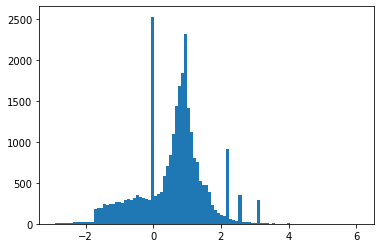

In [12]:
for features,label in packed_ds.batch(1000).take(1):
  print(features[0])
  plt.hist(features.numpy().flatten(), bins = 101)

To keep this tutorial relatively short use just the first 1000 samples for validation, and the next 10 000 for training:

In [13]:
N_VALIDATION = int(1e3)
N_TRAIN = int(1e4)
BUFFER_SIZE = int(1e4)
BATCH_SIZE = 500
STEPS_PER_EPOCH = N_TRAIN//BATCH_SIZE

The `Dataset.skip` and `Dataset.take` methods make this easy.

At the same time, use the `Dataset.cache` method to ensure that the loader doesn't need to re-read the data from the file on each epoch:

In [14]:
validate_ds = packed_ds.take(N_VALIDATION).cache()
train_ds = packed_ds.skip(N_VALIDATION).take(N_TRAIN).cache()

In [15]:
train_ds

<CacheDataset shapes: ((28,), ()), types: (tf.float32, tf.float32)>

These datasets return individual examples. Use the `.batch` method to create batches of an appropriate size for training. Before batching also remember to `.shuffle` and `.repeat` the training set.

In [16]:
validate_ds = validate_ds.batch(BATCH_SIZE)
train_ds = train_ds.shuffle(BUFFER_SIZE).repeat().batch(BATCH_SIZE)

## Demonstrate overfitting

The simplest way to prevent overfitting is to start with a small model: A model with a small number of learnable parameters (which is determined by the number of layers and the number of units per layer). In deep learning, the number of learnable parameters in a model is often referred to as the model's "capacity".

Intuitively, a model with more parameters will have more "memorization capacity" and therefore will be able to easily learn a perfect dictionary-like mapping between training samples and their targets, a mapping without any generalization power, but this would be useless when making predictions on previously unseen data.

Always keep this in mind: deep learning models tend to be good at fitting to the training data, but the real challenge is generalization, not fitting.

On the other hand, if the network has limited memorization resources, it will not be able to learn the mapping as easily. To minimize its loss, it will have to learn compressed representations that have more predictive power. At the same time, if you make your model too small, it will have difficulty fitting to the training data. There is a balance between "too much capacity" and "not enough capacity".

Unfortunately, there is no magical formula to determine the right size or architecture of your model (in terms of the number of layers, or the right size for each layer). You will have to experiment using a series of different architectures.

To find an appropriate model size, it's best to start with relatively few layers and parameters, then begin increasing the size of the layers or adding new layers until you see diminishing returns on the validation loss.

Start with a simple model using only `layers.Dense` as a baseline, then create larger versions, and compare them.

### Training procedure

Many models train better if you gradually reduce the learning rate during training. Use `optimizers.schedules` to reduce the learning rate over time:

In [17]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=STEPS_PER_EPOCH*1000,
  decay_rate=1,
  staircase=False)

def get_optimizer():
  return tf.keras.optimizers.Adam(lr_schedule)

The code above sets a `schedules.InverseTimeDecay` to hyperbolically decrease the learning rate to 1/2 of the base rate at 1000 epochs, 1/3 at 2000 epochs and so on.

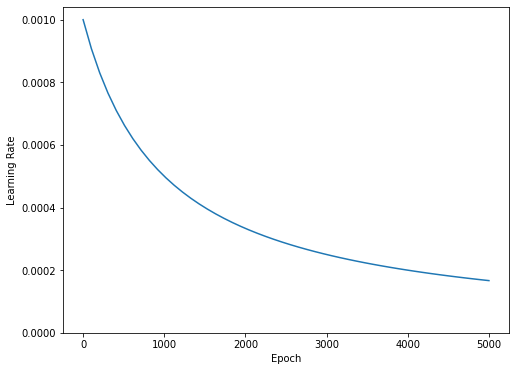

In [18]:
step = np.linspace(0,100000)
lr = lr_schedule(step)
plt.figure(figsize = (8,6))
plt.plot(step/STEPS_PER_EPOCH, lr)
plt.ylim([0,max(plt.ylim())])
plt.xlabel('Epoch')
_ = plt.ylabel('Learning Rate')


Each model in this tutorial will use the same training configuration. So set these up in a reusable way, starting with the list of callbacks.

The training for this tutorial runs for many short epochs. To reduce the logging noise use the `tfdocs.EpochDots` which simply prints a `.` for each epoch, and a full set of metrics every 100 epochs.

Next include `callbacks.EarlyStopping` to avoid long and unnecessary training times. Note that this callback is set to monitor the `val_binary_crossentropy`, not the `val_loss`. This difference will be important later.

Use `callbacks.TensorBoard` to generate TensorBoard logs for the training.


In [19]:
def get_callbacks(name):
  return [
    tfdocs.modeling.EpochDots(),
    tf.keras.callbacks.EarlyStopping(monitor='val_binary_crossentropy', patience=200),
    tf.keras.callbacks.TensorBoard(logdir/name),
  ]

Similarly each model will use the same `Model.compile` and `Model.fit` settings:

In [20]:
def compile_and_fit(model, name, optimizer=None, max_epochs=10000):
  if optimizer is None:
    optimizer = get_optimizer()
  model.compile(optimizer=optimizer,
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=[
                  tf.keras.losses.BinaryCrossentropy(
                      from_logits=True, name='binary_crossentropy'),
                  'accuracy'])

  model.summary()

  history = model.fit(
    train_ds,
    steps_per_epoch = STEPS_PER_EPOCH,
    epochs=max_epochs,
    validation_data=validate_ds,
    callbacks=get_callbacks(name),
    verbose=0)
  return history

### Tiny model

Start by training a model:

In [21]:
tiny_model = tf.keras.Sequential([
    layers.Dense(16, activation='elu', input_shape=(FEATURES,)),
    layers.Dense(1)
])

In [22]:
size_histories = {}

In [23]:
size_histories['Tiny'] = compile_and_fit(tiny_model, 'sizes/Tiny')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                464       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
use `tf.profiler.experimental.stop` instead.



Epoch: 0, accuracy:0.5092,  binary_crossentropy:0.7752,  loss:0.7752,  val_accuracy:0.5110,  val_binary_crossentropy:0.7376,  val_loss:0.7376,  
...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

.
Epoch: 100, accuracy:0.6028,  binary_crossentropy:0.6251,  loss:0.6251,  val_accuracy:0.5680,  val_binary_crossentropy:0.6271,  val_loss:0.6271,  
..

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

..
Epoch: 200, accuracy:0.6231,  binary_crossentropy:0.6137,  loss:0.6137,  val_accuracy:0.5920,  val_binary_crossentropy:0.6146,  val_loss:0.6146,  
.

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

..

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

.
Epoch: 300, accuracy:0.6356,  binary_crossentropy:0.6038,  loss:0.6038,  val_accuracy:0.6190,  val_binary_crossentropy:0.6051,  val_loss:0.6051,  
..

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

..
Epoch: 400, accuracy:0.6470,  binary_crossentropy:0.5963,  loss:0.5963,  val_accuracy:0.6330,  val_binary_crossentropy:0.5968,  val_loss:0.5968,  
.

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...


Epoch: 500, accuracy:0.6619,  binary_crossentropy:0.5909,  loss:0.5909,  val_accuracy:0.6280,  val_binary_crossentropy:0.5939,  val_loss:0.5939,  
...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

.
Epoch: 600, accuracy:0.6618,  binary_crossentropy:0.5872,  loss:0.5872,  val_accuracy:0.6630,  val_binary_crossentropy:0.5910,  val_loss:0.5910,  
..

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

..
Epoch: 700, accuracy:0.6655,  binary_crossentropy:0.5847,  loss:0.5847,  val_accuracy:0.6290,  val_binary_crossentropy:0.5940,  val_loss:0.5940,  
.

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...


Epoch: 800, accuracy:0.6683,  binary_crossentropy:0.5819,  loss:0.5819,  val_accuracy:0.6510,  val_binary_crossentropy:0.5908,  val_loss:0.5908,  
...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

.
Epoch: 900, accuracy:0.6722,  binary_crossentropy:0.5797,  loss:0.5797,  val_accuracy:0.6620,  val_binary_crossentropy:0.5907,  val_loss:0.5907,  
..

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

..
Epoch: 1000, accuracy:0.6761,  binary_crossentropy:0.5779,  loss:0.5779,  val_accuracy:0.6470,  val_binary_crossentropy:0.5910,  val_loss:0.5910,  
.

...

...

...

...

...

...

...

...

...

...

Now check how the model did:

(0.5, 0.7)

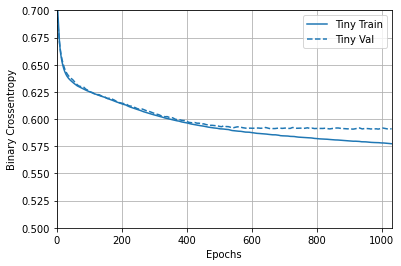

In [24]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'binary_crossentropy', smoothing_std=10)
plotter.plot(size_histories)
plt.ylim([0.5, 0.7])

### Small model

To see if you can beat the performance of the small model, progressively train some larger models.

Try two hidden layers with 16 units each:

In [25]:
small_model = tf.keras.Sequential([
    # `input_shape` is only required here so that `.summary` works.
    layers.Dense(16, activation='elu', input_shape=(FEATURES,)),
    layers.Dense(16, activation='elu'),
    layers.Dense(1)
])

In [26]:
size_histories['Small'] = compile_and_fit(small_model, 'sizes/Small')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                464       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 753
Trainable params: 753
Non-trainable params: 0
_________________________________________________________________



Epoch: 0, accuracy:0.5029,  binary_crossentropy:0.7257,  loss:0.7257,  val_accuracy:0.4720,  val_binary_crossentropy:0.6927,  val_loss:0.6927,  
.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.


Epoch: 100, accuracy:0.6153,  binary_crossentropy:0.6185,  loss:0.6185,  val_accuracy:0.6290,  val_binary_crossentropy:0.6112,  val_loss:0.6112,  
..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

.

.

.


Epoch: 200, accuracy:0.6551,  binary_crossentropy:0.5940,  loss:0.5940,  val_accuracy:0.6540,  val_binary_crossentropy:0.5941,  val_loss:0.5941,  
.

.

.

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.


Epoch: 300, accuracy:0.6678,  binary_crossentropy:0.5824,  loss:0.5824,  val_accuracy:0.6680,  val_binary_crossentropy:0.5904,  val_loss:0.5904,  
..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

.
Epoch: 400, accuracy:0.6731,  binary_crossentropy:0.5754,  loss:0.5754,  val_accuracy:0.6630,  val_binary_crossentropy:0.5872,  val_loss:0.5872,  
.

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..


Epoch: 500, accuracy:0.6836,  binary_crossentropy:0.5679,  loss:0.5679,  val_accuracy:0.6740,  val_binary_crossentropy:0.5834,  val_loss:0.5834,  
.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.


Epoch: 600, accuracy:0.6839,  binary_crossentropy:0.5617,  loss:0.5617,  val_accuracy:0.6760,  val_binary_crossentropy:0.5849,  val_loss:0.5849,  
..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

.

### Medium model

Now try 3 hidden layers with 64 units each:

In [27]:
medium_model = tf.keras.Sequential([
    layers.Dense(64, activation='elu', input_shape=(FEATURES,)),
    layers.Dense(64, activation='elu'),
    layers.Dense(64, activation='elu'),
    layers.Dense(1)
])

And train the model using the same data:

In [28]:
size_histories['Medium']  = compile_and_fit(medium_model, "sizes/Medium")

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                1856      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 10,241
Trainable params: 10,241
Non-trainable params: 0
_________________________________________________________________



Epoch: 0, accuracy:0.5027,  binary_crossentropy:0.6936,  loss:0.6936,  val_accuracy:0.5150,  val_binary_crossentropy:0.6758,  val_loss:0.6758,  
.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.


Epoch: 100, accuracy:0.7075,  binary_crossentropy:0.5382,  loss:0.5382,  val_accuracy:0.6670,  val_binary_crossentropy:0.6027,  val_loss:0.6027,  
..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

.
Epoch: 200, accuracy:0.7705,  binary_crossentropy:0.4498,  loss:0.4498,  val_accuracy:0.6200,  val_binary_crossentropy:0.6833,  val_loss:0.6833,  
.

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

### Large model

As an exercise, you can create an even larger model, and see how quickly it begins overfitting.  Next, let's add to this benchmark a network that has much more capacity, far more than the problem would warrant:

In [29]:
large_model = tf.keras.Sequential([
    layers.Dense(512, activation='elu', input_shape=(FEATURES,)),
    layers.Dense(512, activation='elu'),
    layers.Dense(512, activation='elu'),
    layers.Dense(512, activation='elu'),
    layers.Dense(1)
])

And, again, train the model using the same data:

In [30]:
size_histories['large'] = compile_and_fit(large_model, "sizes/large")

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               14848     
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_12 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 513       
Total params: 803,329
Trainable params: 803,329
Non-trainable params: 0
_________________________________________________________________



Epoch: 0, accuracy:0.5072,  binary_crossentropy:0.8249,  loss:0.8249,  val_accuracy:0.4810,  val_binary_crossentropy:0.6884,  val_loss:0.6884,  
.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.


Epoch: 100, accuracy:1.0000,  binary_crossentropy:0.0025,  loss:0.0025,  val_accuracy:0.6590,  val_binary_crossentropy:1.8242,  val_loss:1.8242,  
..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

.
Epoch: 200, accuracy:1.0000,  binary_crossentropy:0.0001,  loss:0.0001,  val_accuracy:0.6590,  val_binary_crossentropy:2.5014,  val_loss:2.5014,  
.

.

..

.

..

.

..

.

..

.

..

.

..

.

..

### Plot the training and validation losses

The solid lines show the training loss, and the dashed lines show the validation loss (remember: a lower validation loss indicates a better model).

While building a larger model gives it more power, if this power is not constrained somehow it can easily overfit to the training set.

In this example, typically, only the `"Tiny"` model manages to avoid overfitting altogether, and each of the larger models overfit the data more quickly. This becomes so severe for the `"large"` model that you need to switch the plot to a log-scale to really see what's happening.

This is apparent if you plot and compare the validation metrics to the training metrics.

* It's normal for there to be a small difference.
* If both metrics are moving in the same direction, everything is fine.
* If the validation metric begins to stagnate while the training metric continues to improve, you are probably close to overfitting.
* If the validation metric is going in the wrong direction, the model is clearly overfitting.

Text(0.5, 0, 'Epochs [Log Scale]')

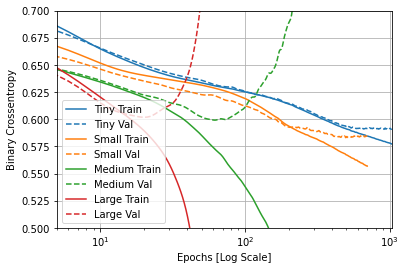

In [31]:
plotter.plot(size_histories)
a = plt.xscale('log')
plt.xlim([5, max(plt.xlim())])
plt.ylim([0.5, 0.7])
plt.xlabel("Epochs [Log Scale]")

Note: All the above training runs used the `callbacks.EarlyStopping` to end the training once it was clear the model was not making progress.

### View in TensorBoard

These models all wrote TensorBoard logs during training.

Open an embedded  TensorBoard viewer inside a notebook:

In [32]:
#docs_infra: no_execute

# Load the TensorBoard notebook extension
%load_ext tensorboard

# Open an embedded TensorBoard viewer
%tensorboard --logdir {logdir}/sizes

You can view the [results of a previous run](https://tensorboard.dev/experiment/vW7jmmF9TmKmy3rbheMQpw/#scalars&_smoothingWeight=0.97) of this notebook on [TensorBoard.dev](https://tensorboard.dev/).

TensorBoard.dev is a managed experience for hosting, tracking, and sharing ML experiments with everyone.

It's also included in an `<iframe>` for convenience:

In [32]:
display.IFrame(
    src="https://tensorboard.dev/experiment/vW7jmmF9TmKmy3rbheMQpw/#scalars&_smoothingWeight=0.97",
    width="100%", height="800px")

If you want to share TensorBoard results you can upload the logs to [TensorBoard.dev](https://tensorboard.dev/) by copying the following into a code-cell.

Note: This step requires a Google account.

```
!tensorboard dev upload --logdir  {logdir}/sizes
```

Caution: This command does not terminate. It's designed to continuously upload the results of long-running experiments. Once your data is uploaded you need to stop it using the "interrupt execution" option in your notebook tool.

## Strategies to prevent overfitting

Before getting into the content of this section copy the training logs from the `"Tiny"` model above, to use as a baseline for comparison.

In [33]:
shutil.rmtree(logdir/'regularizers/Tiny', ignore_errors=True)
shutil.copytree(logdir/'sizes/Tiny', logdir/'regularizers/Tiny')

PosixPath('/tmp/tmp9n203dpq/tensorboard_logs/regularizers/Tiny')

In [34]:
regularizer_histories = {}
regularizer_histories['Tiny'] = size_histories['Tiny']

### Add weight regularization


You may be familiar with Occam's Razor principle: given two explanations for something, the explanation most likely to be correct is the "simplest" one, the one that makes the least amount of assumptions. This also applies to the models learned by neural networks: given some training data and a network architecture, there are multiple sets of weights values (multiple models) that could explain the data, and simpler models are less likely to overfit than complex ones.

A "simple model" in this context is a model where the distribution of parameter values has less entropy (or a model with fewer parameters altogether, as we saw in the section above). Thus a common way to mitigate overfitting is to put constraints on the complexity of a network by forcing its weights only to take small values, which makes the distribution of weight values more "regular". This is called "weight regularization", and it is done by adding to the loss function of the network a cost associated with having large weights. This cost comes in two flavors:

* [L1 regularization](https://developers.google.com/machine-learning/glossary/#L1_regularization), where the cost added is proportional to the absolute value of the weights coefficients (i.e. to what is called the "L1 norm" of the weights).

* [L2 regularization](https://developers.google.com/machine-learning/glossary/#L2_regularization), where the cost added is proportional to the square of the value of the weights coefficients (i.e. to what is called the squared "L2 norm" of the weights). L2 regularization is also called weight decay in the context of neural networks. Don't let the different name confuse you: weight decay is mathematically the exact same as L2 regularization.

L1 regularization pushes weights towards exactly zero encouraging a sparse model. L2 regularization will penalize the weights parameters without making them sparse since the penalty goes to zero for small weights. one reason why L2 is more common.

In `tf.keras`, weight regularization is added by passing weight regularizer instances to layers as keyword arguments. Let's add L2 weight regularization now.

In [35]:
l2_model = tf.keras.Sequential([
    layers.Dense(512, activation='elu',
                 kernel_regularizer=regularizers.l2(0.001),
                 input_shape=(FEATURES,)),
    layers.Dense(512, activation='elu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(512, activation='elu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(512, activation='elu',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1)
])

regularizer_histories['l2'] = compile_and_fit(l2_model, "regularizers/l2")

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               14848     
_________________________________________________________________
dense_15 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_16 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 513       
Total params: 803,329
Trainable params: 803,329
Non-trainable params: 0
_________________________________________________________________



Epoch: 0, accuracy:0.5087,  binary_crossentropy:0.8160,  loss:2.3363,  val_accuracy:0.4770,  val_binary_crossentropy:0.6979,  val_loss:2.1441,  
...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

.
Epoch: 100, accuracy:0.6607,  binary_crossentropy:0.5920,  loss:0.6163,  val_accuracy:0.6530,  val_binary_crossentropy:0.5831,  val_loss:0.6076,  
..

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

..
Epoch: 200, accuracy:0.6820,  binary_crossentropy:0.5789,  loss:0.6033,  val_accuracy:0.6690,  val_binary_crossentropy:0.5799,  val_loss:0.6044,  
.

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...


Epoch: 300, accuracy:0.6865,  binary_crossentropy:0.5696,  loss:0.5947,  val_accuracy:0.6360,  val_binary_crossentropy:0.5839,  val_loss:0.6088,  
...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

.
Epoch: 400, accuracy:0.6908,  binary_crossentropy:0.5639,  loss:0.5908,  val_accuracy:0.6840,  val_binary_crossentropy:0.5898,  val_loss:0.6167,  
..

...

...

...

...

...

...

...

...

...

...

...

...

...

.

`l2(0.001)` means that every coefficient in the weight matrix of the layer will add `0.001 * weight_coefficient_value**2` to the total **loss** of the network.

That is why we're monitoring the `binary_crossentropy` directly. Because it doesn't have this regularization component mixed in.

So, that same `"Large"` model with an `L2` regularization penalty performs much better:


(0.5, 0.7)

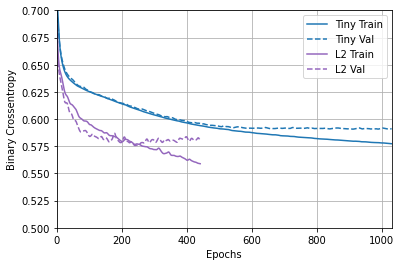

In [36]:
plotter.plot(regularizer_histories)
plt.ylim([0.5, 0.7])

As you can see, the `"L2"` regularized model is now much more competitive with the the `"Tiny"` model. This `"L2"` model is also much more resistant to overfitting than the `"Large"` model it was based on despite having the same number of parameters.

#### More info

There are two important things to note about this sort of regularization.

**First:** if you are writing your own training loop, then you need to be sure to ask the model for its regularization losses.

In [37]:
result = l2_model(features)
regularization_loss=tf.add_n(l2_model.losses)

**Second:** This implementation works by adding the weight penalties to the model's loss, and then applying a standard optimization procedure after that.

There is a second approach that instead only runs the optimizer on the raw loss, and then while applying the calculated step the optimizer also applies some weight decay. This "Decoupled Weight Decay" is seen in optimizers like `optimizers.FTRL` and `optimizers.AdamW`.

### Add dropout

Dropout is one of the most effective and most commonly used regularization techniques for neural networks, developed by Hinton and his students at the University of Toronto.

The intuitive explanation for dropout is that because individual nodes in the network cannot rely on the output of the others, each node must output features that are useful on their own.

Dropout, applied to a layer, consists of randomly "dropping out" (i.e. set to zero) a number of output features of the layer during training. Let's say a given layer would normally have returned a vector [0.2, 0.5, 1.3, 0.8, 1.1] for a given input sample during training; after applying dropout, this vector will have a few zero entries distributed at random, e.g. [0, 0.5,
1.3, 0, 1.1].

The "dropout rate" is the fraction of the features that are being zeroed-out; it is usually set between 0.2 and 0.5. At test time, no units are dropped out, and instead the layer's output values are scaled down by a factor equal to the dropout rate, so as to balance for the fact that more units are active than at training time.

In `tf.keras` you can introduce dropout in a network via the Dropout layer, which gets applied to the output of layer right before.

Let's add two Dropout layers in our network to see how well they do at reducing overfitting:

In [38]:
dropout_model = tf.keras.Sequential([
    layers.Dense(512, activation='elu', input_shape=(FEATURES,)),
    layers.Dropout(0.5),
    layers.Dense(512, activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(1)
])

regularizer_histories['dropout'] = compile_and_fit(dropout_model, "regularizers/dropout")

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               14848     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)              


Epoch: 0, accuracy:0.5073,  binary_crossentropy:0.7984,  loss:0.7984,  val_accuracy:0.5200,  val_binary_crossentropy:0.6761,  val_loss:0.6761,  
.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.


Epoch: 100, accuracy:0.6576,  binary_crossentropy:0.5965,  loss:0.5965,  val_accuracy:0.6730,  val_binary_crossentropy:0.5833,  val_loss:0.5833,  
..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

.
Epoch: 200, accuracy:0.6861,  binary_crossentropy:0.5554,  loss:0.5554,  val_accuracy:0.6790,  val_binary_crossentropy:0.5830,  val_loss:0.5830,  
.

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..

.

..


Epoch: 300, accuracy:0.7280,  binary_crossentropy:0.5102,  loss:0.5102,  val_accuracy:0.6860,  val_binary_crossentropy:0.6088,  val_loss:0.6088,  
.

..

.

..

.

..

.

..

.

..

.

(0.5, 0.7)

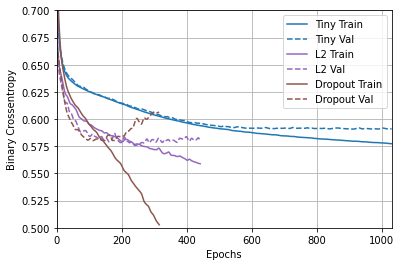

In [39]:
plotter.plot(regularizer_histories)
plt.ylim([0.5, 0.7])

It's clear from this plot that both of these regularization approaches improve the behavior of the `"Large"` model. But this still doesn't beat even the `"Tiny"` baseline.

Next try them both, together, and see if that does better.

### Combined L2 + dropout

In [40]:
combined_model = tf.keras.Sequential([
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu', input_shape=(FEATURES,)),
    layers.Dropout(0.5),
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(512, kernel_regularizer=regularizers.l2(0.0001),
                 activation='elu'),
    layers.Dropout(0.5),
    layers.Dense(1)
])

regularizer_histories['combined'] = compile_and_fit(combined_model, "regularizers/combined")

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 512)               14848     
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 512)              


Epoch: 0, accuracy:0.5034,  binary_crossentropy:0.8003,  loss:0.9588,  val_accuracy:0.5040,  val_binary_crossentropy:0.6752,  val_loss:0.8330,  
...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

.
Epoch: 100, accuracy:0.6514,  binary_crossentropy:0.6067,  loss:0.6373,  val_accuracy:0.6470,  val_binary_crossentropy:0.5868,  val_loss:0.6173,  
..

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

..
Epoch: 200, accuracy:0.6664,  binary_crossentropy:0.5900,  loss:0.6158,  val_accuracy:0.6510,  val_binary_crossentropy:0.5795,  val_loss:0.6053,  
.

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...


Epoch: 300, accuracy:0.6690,  binary_crossentropy:0.5822,  loss:0.6104,  val_accuracy:0.6940,  val_binary_crossentropy:0.5611,  val_loss:0.5892,  
...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

.
Epoch: 400, accuracy:0.6773,  binary_crossentropy:0.5764,  loss:0.6063,  val_accuracy:0.6820,  val_binary_crossentropy:0.5539,  val_loss:0.5839,  
..

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

..
Epoch: 500, accuracy:0.6840,  binary_crossentropy:0.5695,  loss:0.6012,  val_accuracy:0.6870,  val_binary_crossentropy:0.5500,  val_loss:0.5818,  
.

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...


Epoch: 600, accuracy:0.6821,  binary_crossentropy:0.5692,  loss:0.6023,  val_accuracy:0.6850,  val_binary_crossentropy:0.5456,  val_loss:0.5787,  
...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

.
Epoch: 700, accuracy:0.6836,  binary_crossentropy:0.5678,  loss:0.6021,  val_accuracy:0.6870,  val_binary_crossentropy:0.5502,  val_loss:0.5846,  
..

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

..
Epoch: 800, accuracy:0.6908,  binary_crossentropy:0.5585,  loss:0.5940,  val_accuracy:0.7000,  val_binary_crossentropy:0.5424,  val_loss:0.5780,  
.

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...


Epoch: 900, accuracy:0.6931,  binary_crossentropy:0.5583,  loss:0.5948,  val_accuracy:0.6860,  val_binary_crossentropy:0.5447,  val_loss:0.5813,  
...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

.
Epoch: 1000, accuracy:0.6919,  binary_crossentropy:0.5563,  loss:0.5940,  val_accuracy:0.7100,  val_binary_crossentropy:0.5422,  val_loss:0.5799,  
..

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

..
Epoch: 1100, accuracy:0.6914,  binary_crossentropy:0.5545,  loss:0.5935,  val_accuracy:0.6940,  val_binary_crossentropy:0.5375,  val_loss:0.5765,  
.

...

...

..

..

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

..
Epoch: 1200, accuracy:0.7012,  binary_crossentropy:0.5466,  loss:0.5867,  val_accuracy:0.6970,  val_binary_crossentropy:0.5429,  val_loss:0.5831,  
.

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...

...


Epoch: 1300, accuracy:0.6939,  binary_crossentropy:0.5491,  loss:0.5903,  val_accuracy:0.6950,  val_binary_crossentropy:0.5477,  val_loss:0.5890,  
..

(0.5, 0.7)

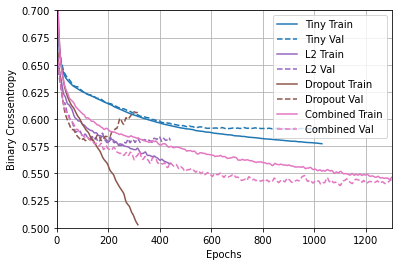

In [41]:
plotter.plot(regularizer_histories)
plt.ylim([0.5, 0.7])

This model with the `"Combined"` regularization is obviously the best one so far.

### View in TensorBoard

These models also recorded TensorBoard logs.

To open an embedded  tensorboard viewer inside a notebook, copy the following into a code-cell:

```
%tensorboard --logdir {logdir}/regularizers
```

You can view the [results of a previous run](https://tensorboard.dev/experiment/fGInKDo8TXes1z7HQku9mw/#scalars&_smoothingWeight=0.97) of this notebook on [TensorDoard.dev](https://tensorboard.dev/).

It's also included in an `<iframe>` for convenience:

In [42]:
display.IFrame(
    src="https://tensorboard.dev/experiment/fGInKDo8TXes1z7HQku9mw/#scalars&_smoothingWeight=0.97",
    width = "100%",
    height="800px")


This was uploaded with:

```
!tensorboard dev upload --logdir  {logdir}/regularizers
```

## Conclusions

To recap: here are the most common ways to prevent overfitting in neural networks:

* Get more training data.
* Reduce the capacity of the network.
* Add weight regularization.
* Add dropout.

Two important approaches not covered in this guide are:

* data-augmentation
* batch normalization

Remember that each method can help on its own, but often combining them can be even more effective.